In [1]:
%load_ext autoreload
%autoreload 2

from repo2 import *
import numpy as np
import seaborn as sns
from sklearn.metrics import roc_curve, auc
import utils as u
import result_gen_utils as ru

In [13]:

# get the file names
train_files, test_files = u.train_test_half_vids('/data/home/shruti/voxceleb/vgg/leaders/')


before 4105
after 3739


In [48]:

def get_repo_size_dist(in_id, in_size_rng):
    
    out_result = np.zeros((len(in_size_rng), 2))
    
    fab_repo = Repo2('/data/home/shruti/voxceleb/fabnet_metric/', 1, 1, np.mean, -1)
    fab_repo.add_ids({in_id: train_files[in_id]}, 0, 1)
    fab_repo.build_repo_noKDD()
    actual_emb = fab_repo.emb.copy()
    actual_label = fab_repo.label.copy()
    
    idx = np.arange(len(actual_emb), dtype=np.int32)
    np.random.seed(0)
    
    for i in range(len(in_size_rng)):
        
        # sample the points from the emb to be used
        cur_id = idx[:in_size_rng[i]]#np.random.choice(idx, in_size_rng[i])
        fab_repo.emb = actual_emb[cur_id, :].copy()
        fab_repo.label = actual_label[cur_id].copy()
        
        fab_result = fab_repo.dist_using_dict({in_id: test_files['real'][in_id]}, 0, 1, parallel=True, dist='cosine')        
        fab_sim = np.nanmax(np.array(list(fab_result['sim'])), axis=1)
        
        out_result[i, 0] = in_size_rng[i]
        out_result[i, 1] = np.mean(fab_sim)
        #print(out_result[i, :])
        
    out_df = pd.DataFrame(data=out_result, columns=['size', 'mean_dist'])
    out_df['Name'] = in_id
    return out_df


In [49]:

full_df = {}
size_rng = np.concatenate((np.arange(1, 12), (5000*np.logspace(-2.2, 0, 50)).astype(np.int32)), axis=0) # 1 to 5000 in logspace
for i in ['bo','br','bs','cb','ew','hc','kh','pb','jb']:
    full_df[i] = get_repo_size_dist(i, size_rng)


Number of labels 1
Build repo time: 2.435 Size: (193817, 512)


[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:   12.5s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:   17.3s
[Parallel(n_jobs=16)]: Done 217 out of 217 | elapsed:   18.8s finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done 217 out of 217 | elapsed:    1.7s finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.4s
[Parallel(n_jobs=16)]: Done 217 out of 217 | elapsed:    2.0s finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.3s
[Parallel(n_jobs=16)]: Done 217 out of 217 | elapsed:    2.1s finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done 217 out of 217 | elapsed:    1.9s finished
[Parallel(n_

[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.7s
[Parallel(n_jobs=16)]: Done 186 out of 217 | elapsed:    5.2s remaining:    0.9s
[Parallel(n_jobs=16)]: Done 217 out of 217 | elapsed:    5.9s finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.6s
[Parallel(n_jobs=16)]: Done 217 out of 217 | elapsed:    4.8s finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.6s
[Parallel(n_jobs=16)]: Done 217 out of 217 | elapsed:    5.5s finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.6s
[Parallel(n_jobs=16)]: Done 186 out of 217 | elapsed:    5.3s remaining:    0.9s
[Parallel(n_jobs=16)]: Done 217 out of 217 | elapsed:    5.3s finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers

Number of labels 1
Build repo time: 0.395 Size: (31712, 512)


[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  16 out of  47 | elapsed:    0.6s remaining:    1.1s
[Parallel(n_jobs=16)]: Done  47 out of  47 | elapsed:    1.3s finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  16 out of  47 | elapsed:    0.2s remaining:    0.4s
[Parallel(n_jobs=16)]: Done  47 out of  47 | elapsed:    0.6s finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  16 out of  47 | elapsed:    0.2s remaining:    0.5s
[Parallel(n_jobs=16)]: Done  47 out of  47 | elapsed:    0.7s finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  16 out of  47 | elapsed:    0.2s remaining:    0.4s
[Parallel(n_jobs=16)]: Done  47 out of  47 | elapsed:    0.7s finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parall

[Parallel(n_jobs=16)]: Done  16 out of  47 | elapsed:    0.5s remaining:    1.0s
[Parallel(n_jobs=16)]: Done  47 out of  47 | elapsed:    1.4s finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  16 out of  47 | elapsed:    0.5s remaining:    1.0s
[Parallel(n_jobs=16)]: Done  47 out of  47 | elapsed:    1.4s finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  16 out of  47 | elapsed:    0.6s remaining:    1.1s
[Parallel(n_jobs=16)]: Done  47 out of  47 | elapsed:    1.4s finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  16 out of  47 | elapsed:    0.6s remaining:    1.1s
[Parallel(n_jobs=16)]: Done  47 out of  47 | elapsed:    1.3s finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  16 out of  47 | elapsed:    0.5s remaining:    1.0s
[Pa

Number of labels 1
Build repo time: 0.841 Size: (66091, 512)


[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  64 out of  95 | elapsed:    1.5s remaining:    0.7s
[Parallel(n_jobs=16)]: Done  95 out of  95 | elapsed:    1.6s finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  95 out of  95 | elapsed:    0.4s finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  95 out of  95 | elapsed:    0.5s finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  95 out of  95 | elapsed:    0.7s finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  95 out of  95 | elapsed:    0.6s finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  95 out of  95 | elapsed:    0.7s finished
[Parallel(n_jobs=16)]: Using ba

[Parallel(n_jobs=16)]: Done  95 out of  95 | elapsed:    2.1s finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  64 out of  95 | elapsed:    1.8s remaining:    0.9s
[Parallel(n_jobs=16)]: Done  95 out of  95 | elapsed:    2.1s finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.6s
[Parallel(n_jobs=16)]: Done  64 out of  95 | elapsed:    1.7s remaining:    0.8s
[Parallel(n_jobs=16)]: Done  95 out of  95 | elapsed:    2.3s finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  95 out of  95 | elapsed:    2.1s finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  64 out of  95 | elapsed:    2.0s remaining:    1.0s
[Parallel(n_jobs=16)]: Done  95 out of  95 | elapsed:    2.3s finished
[Parallel(n_jobs=16)]: Using bac

Number of labels 1
Build repo time: 0.582 Size: (46672, 512)


[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  74 out of  74 | elapsed:    1.2s finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  74 out of  74 | elapsed:    0.4s finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  74 out of  74 | elapsed:    0.5s finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  74 out of  74 | elapsed:    0.6s finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  74 out of  74 | elapsed:    0.5s finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  74 out of  74 | elapsed:    0.6s finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  74 out

[Parallel(n_jobs=16)]: Done  74 out of  74 | elapsed:    2.1s finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  74 out of  74 | elapsed:    2.0s finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  74 out of  74 | elapsed:    2.0s finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.6s
[Parallel(n_jobs=16)]: Done  74 out of  74 | elapsed:    2.3s finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  74 out of  74 | elapsed:    2.2s finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  74 out of  74 | elapsed:    2.4s finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  74 out of  74 | elaps

Number of labels 1
Build repo time: 0.428 Size: (34249, 512)


[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  29 out of  60 | elapsed:    0.9s remaining:    1.0s
[Parallel(n_jobs=16)]: Done  60 out of  60 | elapsed:    1.3s finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  60 out of  60 | elapsed:    0.3s finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  29 out of  60 | elapsed:    0.3s remaining:    0.3s
[Parallel(n_jobs=16)]: Done  60 out of  60 | elapsed:    0.5s finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  29 out of  60 | elapsed:    0.3s remaining:    0.3s
[Parallel(n_jobs=16)]: Done  60 out of  60 | elapsed:    0.4s finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  29 out of  60 | elapsed:    0.3s remaining:    0.3s
[Parall

[Parallel(n_jobs=16)]: Done  29 out of  60 | elapsed:    0.9s remaining:    0.9s
[Parallel(n_jobs=16)]: Done  60 out of  60 | elapsed:    1.3s finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  29 out of  60 | elapsed:    1.0s remaining:    1.1s
[Parallel(n_jobs=16)]: Done  60 out of  60 | elapsed:    1.6s finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  29 out of  60 | elapsed:    1.0s remaining:    1.0s
[Parallel(n_jobs=16)]: Done  60 out of  60 | elapsed:    1.4s finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  29 out of  60 | elapsed:    1.0s remaining:    1.1s
[Parallel(n_jobs=16)]: Done  60 out of  60 | elapsed:    1.4s finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  29 out of  60 | elapsed:    0.9s remaining:    1.0s
[Pa

Number of labels 1
Build repo time: 0.463 Size: (36570, 512)


[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  32 out of  32 | elapsed:    1.0s finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  32 out of  32 | elapsed:    0.4s finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  32 out of  32 | elapsed:    0.5s finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  32 out of  32 | elapsed:    0.4s finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  32 out of  32 | elapsed:    0.4s finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  32 out of  32 | elapsed:    0.3s finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  32 out

[Parallel(n_jobs=16)]: Done  32 out of  32 | elapsed:    1.2s finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  32 out of  32 | elapsed:    1.3s finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  32 out of  32 | elapsed:    1.2s finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  32 out of  32 | elapsed:    1.3s finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  32 out of  32 | elapsed:    1.2s finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  32 out of  32 | elapsed:    1.3s finished


Number of labels 1
Build repo time: 0.345 Size: (27665, 512)


[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done   6 out of  37 | elapsed:    0.1s remaining:    0.8s
[Parallel(n_jobs=16)]: Done  37 out of  37 | elapsed:    1.0s finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done   6 out of  37 | elapsed:    0.1s remaining:    0.4s
[Parallel(n_jobs=16)]: Done  37 out of  37 | elapsed:    0.3s finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done   6 out of  37 | elapsed:    0.1s remaining:    0.4s
[Parallel(n_jobs=16)]: Done  37 out of  37 | elapsed:    0.3s finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done   6 out of  37 | elapsed:    0.1s remaining:    0.5s
[Parallel(n_jobs=16)]: Done  37 out of  37 | elapsed:    0.4s finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parall

[Parallel(n_jobs=16)]: Done   6 out of  37 | elapsed:    0.2s remaining:    0.9s
[Parallel(n_jobs=16)]: Done  37 out of  37 | elapsed:    1.2s finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done   6 out of  37 | elapsed:    0.2s remaining:    1.1s
[Parallel(n_jobs=16)]: Done  37 out of  37 | elapsed:    0.8s finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done   6 out of  37 | elapsed:    0.2s remaining:    0.8s
[Parallel(n_jobs=16)]: Done  37 out of  37 | elapsed:    1.2s finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done   6 out of  37 | elapsed:    0.2s remaining:    0.9s
[Parallel(n_jobs=16)]: Done  37 out of  37 | elapsed:    1.3s finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done   6 out of  37 | elapsed:    0.2s remaining:    1.0s
[Pa

Number of labels 1
Build repo time: 0.380 Size: (30391, 512)


[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  15 out of  46 | elapsed:    0.4s remaining:    0.8s
[Parallel(n_jobs=16)]: Done  46 out of  46 | elapsed:    1.1s finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  46 out of  46 | elapsed:    0.3s finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  15 out of  46 | elapsed:    0.1s remaining:    0.2s
[Parallel(n_jobs=16)]: Done  46 out of  46 | elapsed:    0.4s finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  15 out of  46 | elapsed:    0.1s remaining:    0.2s
[Parallel(n_jobs=16)]: Done  46 out of  46 | elapsed:    0.5s finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  15 out of  46 | elapsed:    0.1s remaining:    0.2s
[Parall

[Parallel(n_jobs=16)]: Done  15 out of  46 | elapsed:    0.5s remaining:    1.0s
[Parallel(n_jobs=16)]: Done  46 out of  46 | elapsed:    1.3s finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  15 out of  46 | elapsed:    0.5s remaining:    1.1s
[Parallel(n_jobs=16)]: Done  46 out of  46 | elapsed:    1.4s finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  15 out of  46 | elapsed:    0.4s remaining:    0.9s
[Parallel(n_jobs=16)]: Done  46 out of  46 | elapsed:    1.2s finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  15 out of  46 | elapsed:    0.5s remaining:    1.1s
[Parallel(n_jobs=16)]: Done  46 out of  46 | elapsed:    1.2s finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  15 out of  46 | elapsed:    0.5s remaining:    1.1s
[Pa

Number of labels 1
Build repo time: 0.414 Size: (33185, 512)


[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  12 out of  43 | elapsed:    0.4s remaining:    0.9s
[Parallel(n_jobs=16)]: Done  43 out of  43 | elapsed:    1.2s finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  43 out of  43 | elapsed:    0.3s finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  12 out of  43 | elapsed:    0.2s remaining:    0.4s
[Parallel(n_jobs=16)]: Done  43 out of  43 | elapsed:    0.6s finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  12 out of  43 | elapsed:    0.1s remaining:    0.3s
[Parallel(n_jobs=16)]: Done  43 out of  43 | elapsed:    0.6s finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  12 out of  43 | elapsed:    0.2s remaining:    0.5s
[Parall

[Parallel(n_jobs=16)]: Done  12 out of  43 | elapsed:    0.4s remaining:    0.9s
[Parallel(n_jobs=16)]: Done  43 out of  43 | elapsed:    1.3s finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  12 out of  43 | elapsed:    0.3s remaining:    0.9s
[Parallel(n_jobs=16)]: Done  43 out of  43 | elapsed:    1.3s finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  12 out of  43 | elapsed:    0.4s remaining:    1.1s
[Parallel(n_jobs=16)]: Done  43 out of  43 | elapsed:    1.3s finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  43 out of  43 | elapsed:    0.8s finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  12 out of  43 | elapsed:    0.3s remaining:    0.8s
[Parallel(n_jobs=16)]: Done  43 out of  43 | elapsed:    1.1s finished
[Parallel(n_j

In [40]:
u.save_obj(full_df, 'ECCV20_figures', 'distVSrepoSize')

In [ ]:
full_df = u.load_obj('result_csv', 'distVSrepoSize')

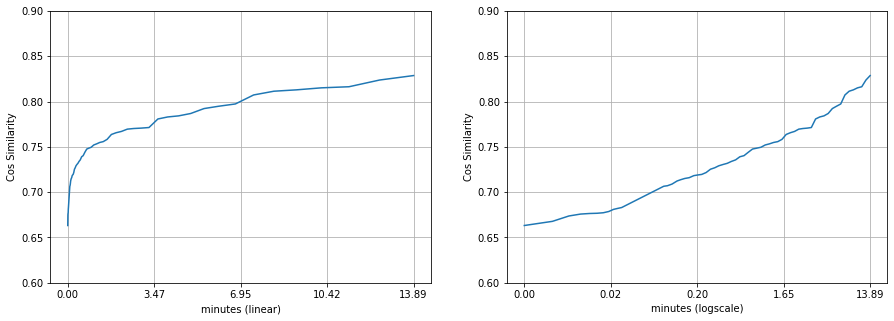

In [51]:

def plot_one_size(in_dict, in_ids, f_nm, ax):
    
    avg_feat = np.zeros((len(size_rng), ))
    for k in in_ids:
        avg_feat = avg_feat + np.array(in_dict[k][f_nm])
    
    avg_feat = avg_feat/len(in_ids)
    cur_sz = size_rng*5/(30*60) # these many seconds
    ax[0].plot(cur_sz, avg_feat)
    ax[1].plot(np.log10(cur_sz), avg_feat)
    
    # xticks 
    xtck2 = np.linspace(np.log10(cur_sz[0]), np.log10(cur_sz[-1]), 5)
    xtck1 = np.linspace(cur_sz[0], cur_sz[-1], 5)
    ax[0].set_xticks(xtck1)
    ax[0].set_xticklabels([f'{f:.2f}' for f in xtck1], rotation=0)
    ax[1].set_xticks(xtck2)
    ax[1].set_xticklabels([f'{10**f:.2f}' for f in xtck2], rotation=0)
    ax[0].grid(b=True)
    ax[1].grid(b=True)    

_, ax = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))
plot_one_size(full_df,  ['bo','br','bs','cb','ew','hc','jb','kh', 'pb'], 'mean_dist', ax)
    
ax[0].set_xlabel('minutes (linear)')
ax[1].set_xlabel('minutes (logscale)')
ax[0].set_ylabel('Cos Similarity')
ax[1].set_ylabel('Cos Similarity')

ax[0].set_ylim([0.6, 0.9])
ax[1].set_ylim([0.6, 0.9])
plt.show()


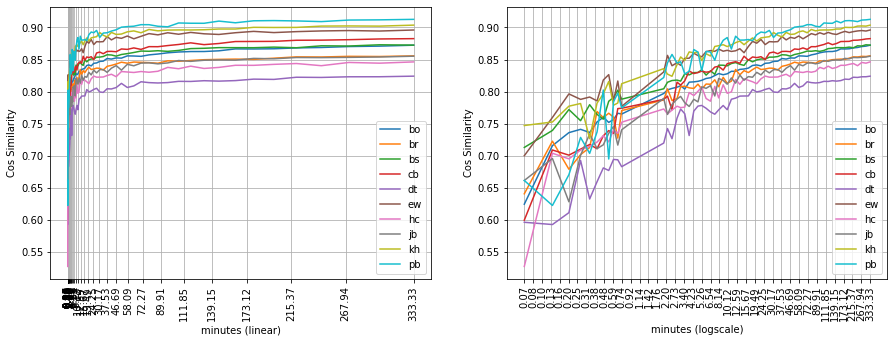

In [27]:

def plot_one_size(in_df, in_id, f_nm, ax):
    
    cur_sz = np.array(in_df['size'])*4/60 # these many seconds
    ax[0].plot(cur_sz, np.array(in_df[f_nm]), label=in_id)
    ax[1].plot(np.log10(cur_sz), np.array(in_df[f_nm]), label=in_id)
    
    # xticks 
    xtck2 = np.linspace(np.log10(cur_sz[0]), np.log10(cur_sz[-1]), 40)
    xtck1 = 10**(xtck2)
    ax[0].set_xticks(xtck1)
    ax[0].set_xticklabels([f'{f:.2f}' for f in xtck1], rotation=90)
    ax[1].set_xticks(xtck2)
    ax[1].set_xticklabels([f'{f:.2f}' for f in xtck1], rotation=90)
    ax[0].grid(b=True)
    ax[1].grid(b=True)    

ldrs = ['bo','br','bs','cb','dt','ew','hc','jb','kh', 'pb']
_, ax = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))

for i in range(len(ldrs)):
    
    plot_one_size(full_df[ldrs[i]], ldrs[i], 'mean_dist', ax)
    
ax[0].set_xlabel('minutes (linear)')
ax[1].set_xlabel('minutes (logscale)')
ax[0].set_ylabel('Cos Similarity')
ax[1].set_ylabel('Cos Similarity')

#ax[0].set_ylim([0.6, 1])
#ax[1].set_ylim([0.6, 1])
ax[0].legend()
ax[1].legend()
plt.show()

# different context plots

In [ ]:
## 2) same person same context vs different person same context vs same person different context vs different person different context
# faceswaps with same context faceid, same context behaveid

# Questions not answered: 
# not sure how to proof there is disentaglement from the face id???
# how to ensure after one hour of video we won't match to any one else

# consider GG data with ids and context dict
cntxt = {'neutral_wall': ['__talking_against_wall'], 
         'laugh': ['__outside_talking_still_laughing', '__outside_talking_pan_laughing'],
         'angry': ['__talking_angry_couch'],
         'happy': ['__podium_speech_happy'],
         'neutral_frnd': ['__kitchen_still', '__kitchen_pan']}

ids = [f'{f+1:02d}' for f in range(28)]                


In [ ]:
# read all the emb in a dictionary with context and id as keys
all_emb = {}
bs_fldr = '/data/home/shruti/voxceleb/fabnet_metric/GG_orig'
for i in ids:
    
    all_emb[i] = {}
    for j in cntxt.keys():
        
        #files
        cur_files = [i + f + '.npy' for f in cntxt[j]]
        all_emb[i][j] = []
        for f in cur_files:
            if os.path.exists(os.path.join(bs_fldr, f)):
                X = np.load(os.path.join(bs_fldr, f))
                X = X - np.mean(X, axis=1, keepdims=True)        
                X = X / np.linalg.norm(X, axis=1, keepdims=True) # normalize                
                all_emb[i][j] = all_emb[i][j] + [X]


In [ ]:
def get_one_comb_df(id1, id2, cntxt1, cntxt2):
    
    if id1 == id2 and cntxt1==cntxt2:
        if len(all_emb[id1][cntxt1])>1:                
            sim_mat = np.matmul(all_emb[id1][cntxt1][0], all_emb[id1][cntxt1][1].T)
        else:
            return None

    else: 
        if len(all_emb[id1][cntxt1])>0 and len(all_emb[id2][cntxt2])>0:
            sim_mat = np.matmul(all_emb[id1][cntxt1][0], all_emb[id2][cntxt2][-1].T)
        else:
            return None

    cur_max_dist = 1-np.max(sim_mat, axis=0)
    out_df = pd.DataFrame(data=cur_max_dist, columns=['dist'])
    out_df['id1'] = id1
    out_df['id2'] = id2
    out_df['cntxt1'] = cntxt1
    out_df['cntxt2'] = cntxt2
    
    return out_df

cntxt_keys = list(cntxt.keys())

all_df = []
for i in range(len(ids)):
    
    for j in range(i, len(ids)):
        
        for c1 in range(len(cntxt_keys)):
            
            for c2 in range(c1, len(cntxt_keys)):
                
                print(ids[i], ids[j], cntxt_keys[c1], cntxt_keys[c2])
                cur_df = get_one_comb_df(ids[i], ids[j], cntxt_keys[c1], cntxt_keys[c2])
                if cur_df is not None:
                    all_df = all_df + [cur_df]
                    

In [ ]:
all_df = pd.concat(all_df, ignore_index=True, sort=False)

In [ ]:
# plot of distance distributions
bins = np.linspace(0,1, 40)

plt.figure(figsize=(8,8))
# same id same context
dist = 1-np.array(all_df[(all_df['id1']==all_df['id2'])&
                    (all_df['cntxt1']==all_df['cntxt2'])]['dist'])
sns.distplot(dist, bins=bins, label=f'sID_sC {len(dist)}')

# same id different context
dist = 1-np.array(all_df[(all_df['id1']==all_df['id2'])&
                    (all_df['cntxt1']!=all_df['cntxt2'])]['dist'])
sns.distplot(dist, bins=bins, label=f'sID_dC {len(dist)}')

# different id same context
dist = 1-np.array(all_df[(all_df['id1']!=all_df['id2'])&
                    (all_df['cntxt1']==all_df['cntxt2'])]['dist'])
sns.distplot(dist, bins=bins, label=f'dID_sC {len(dist)}')

# diff id diff context
dist = 1-np.array(all_df[(all_df['id1']!=all_df['id2'])&
                    (all_df['cntxt1']!=all_df['cntxt2'])]['dist'])
sns.distplot(dist, bins=bins, label=f'dID_dC {len(dist)}')
plt.plot([0.75, 0.75], [0, 10], 'r--')

plt.xlabel('Cosine Similarity')
plt.legend()
plt.show()

## face swap context distributions

In [ ]:
fk_files = ['__outside_talking_pan_laughing', '__kitchen_pan']


In [ ]:
# all the fake files of kitchen pan and outdoor pan
GG_fake_test_files = u.load_file_names('/data/home/shruti/voxceleb/fabnet_metric/', 'GG_fake', join_bsfldr=False)
GG_fake_test_files = [f for f in GG_fake_test_files if np.any([x in f for x in fk_files])]
GG_fake_test_files

In [ ]:

# for each fake file
# load the feature
# compare the file with orignal of face id (1 is face), behav id (0 is behav) of original
fake_face_dist = {}
fake_behv_dist = {}
for i in range(len(GG_fake_test_files)):
    
    cur_cntxt = 'neutral_frnd'
    if 'laugh' in GG_fake_test_files[i]:
        cur_cntxt = 'laugh'
        
    # load the current file
    fk_feat = np.load(os.path.join('/data/home/shruti/voxceleb/fabnet_metric/', 
                                   GG_fake_test_files[i]))
    fk_feat = fk_feat - np.mean(fk_feat, axis=1, keepdims=True)        
    fk_feat = fk_feat / np.linalg.norm(fk_feat, axis=1, keepdims=True) # normalize
    
    # face id
    face_id = GG_fake_test_files[i].split('/')[-1].split('_')[1]
    if len(all_emb[face_id][cur_cntxt])>0:
        sim_mat = np.matmul(all_emb[face_id][cur_cntxt][0], fk_feat.T)
        fake_face_dist[i] = 1-np.max(sim_mat, axis=0)

    # behavior id
    behav_id = GG_fake_test_files[i].split('/')[-1].split('_')[0]
    if len(all_emb[behav_id][cur_cntxt])>0:
        sim_mat = np.matmul(all_emb[behav_id][cur_cntxt][0], fk_feat.T)
        fake_behv_dist[i] = 1-np.max(sim_mat, axis=0)



In [ ]:
# plot of distance distributions
bins = np.linspace(0,1, 40)

plt.figure(figsize=(8,8))
# same id same context
dist = 1-np.array(all_df[(all_df['id1']==all_df['id2'])&
                    (all_df['cntxt1']==all_df['cntxt2'])]['dist'])
sns.distplot(dist, bins=bins, label=f'real sID sC {len(dist)}')

# fake 
dist = 1-np.concatenate(list(fake_face_dist.values()), axis=0)
sns.distplot(dist, 
             bins=bins, label=f'fake faceID sC {len(dist)}')

# different id same context
dist = 1-np.concatenate(list(fake_behv_dist.values()), axis=0)
sns.distplot(dist, 
             bins=bins, label=f'fake behavID sC {len(dist)}')

# different id same context
dist = 1-np.array(all_df[(all_df['id1']!=all_df['id2'])&
                    (all_df['cntxt1']==all_df['cntxt2'])]['dist'])
sns.distplot(dist, bins=bins, label=f'dID_sC {len(dist)}')

plt.plot([0.75, 0.75], [0, 10], 'r--')
plt.xlabel('Cosine Similarity')
plt.legend()
plt.show()


# accuracy vs repo size


In [2]:

train_files, test_files = u.train_test_all_ids('/data/home/shruti/voxceleb/features/vgg/leaders/')


before 4105
after 3739


In [3]:

size_rng = np.concatenate((np.arange(1, 12), (2000*np.logspace(-2.2, 0, 50)).astype(np.int32)), axis=0) # 1 to 5000 in logspace
size_rng

array([   1,    2,    3,    4,    5,    6,    7,    8,    9,   10,   11,
         12,   13,   15,   17,   19,   21,   23,   26,   28,   31,   35,
         39,   43,   48,   53,   59,   65,   73,   81,   89,   99,  110,
        122,  136,  150,  167,  185,  205,  228,  252,  280,  311,  344,
        382,  424,  470,  521,  578,  641,  711,  788,  874,  969, 1075,
       1192, 1322, 1466, 1626, 1803, 2000])

In [21]:

def save_results(vgg_repo, fab_repo, test_ids, r_or_f, N_f, out_file, n1, n2, parallel=False):
        
    # number of files per id
    test_dict = {}
    for ids in test_ids:
        cur_test_files = test_files[r_or_f][ids]
        if N_f>0 and len(cur_test_files)>N_f:
            test_dict[ids] = cur_test_files[:N_f].copy()
        else:
            test_dict[ids] = cur_test_files.copy()
            
    vgg_result = vgg_repo.dist_using_dict(test_dict, n1, n2, parallel=parallel)
    vgg_result['RealFake'] = r_or_f
    fab_result = fab_repo.dist_using_dict(test_dict, n1, n2, parallel=parallel)
    fab_result['RealFake'] = r_or_f
    full_df = vgg_result.set_index('fileName').join(fab_result.set_index('fileName'), 
                                                 how='inner', lsuffix='_vgg', rsuffix='_fab')
    full_df = full_df[['actualLabel_vgg', 
                       'RealFake_vgg', 'sim_vgg', 'sim_fab']].copy()
    
    if out_file is not None:
        full_df.to_pickle(out_file)
        
    return full_df

def compute_acc_optout(in_score, in_thres):
    # non-nan features
    nn_id = np.logical_not(np.isnan(in_score))
    return np.sum(in_score[nn_id]>in_thres)/np.sum(nn_id), (len(in_score)-np.sum(nn_id))/len(in_score)



In [34]:

def get_repo_size_accuracy(in_size_rng):
    
    out_result = np.zeros((len(in_size_rng), 3))
    
    # ldrs
    keys = ['bo','br','bs','cb','dt','ew','hc','jb','kh', 'pb',
            'bo_imposter','bs_imposter','ew_imposter','dt_imposter',
            'hc_imposter', 'jb_imposter']
    
    # repo
    vgg_repo_metric = u.load_obj('result_csv', 'vgg_repo')
    fab_repo_metric = u.load_obj('result_csv', 'fab_repo')
    
    vgg_repo_metric.bs_fldr = '/data/home/shruti/voxceleb/features/vgg/leaders/'
    fab_repo_metric.bs_fldr = '/data/home/shruti/voxceleb/features/fabnet_metric/'

    # full embeddings per person
    fab_emb = {}
    vgg_emb = {}
    for k in keys:
        vgg_emb[k] = vgg_repo_metric.pop_ids([k])
        fab_emb[k] = fab_repo_metric.pop_ids([k])

    #np.random.seed(0)    
    for i in range(len(in_size_rng)):
        
        # sample the points from the emb to be used
        for k in keys:
            # emb to the current repo
            fab_id = np.random.choice(np.arange(len(fab_emb[k])), in_size_rng[i])
            fab_repo_metric.add_emb_ids(fab_emb[k][fab_id, :], k)
            #vgg_id = np.random.choice(np.arange(len(vgg_emb[k])), in_size_rng[i])
            vgg_repo_metric.add_emb_ids(vgg_emb[k], k)
            
        real_res = save_results(vgg_repo_metric, fab_repo_metric, 
                            ['bo','bs','dt','ew','hc','jb'], 
                            'real', 10, 
                            None, 0, 1, parallel=True)
        fake_res = save_results(vgg_repo_metric, fab_repo_metric, 
                            ['bo','bs','dt','ew','hc','jb'], 
                            'fake', 10, 
                            None, 0, 1, parallel=True)

        tpr, _ = compute_acc_optout(ru.get_comb_Or_scaleMaxVGGFab(real_res, 
                                                                  mu_sigVGG=(0.86, 0.0001), 
                                                                  mu_sigFab=(0.3, 0.0001)), 0.0001)
        fpr, _ = compute_acc_optout(ru.get_comb_Or_scaleMaxVGGFab(fake_res, 
                                                                  mu_sigVGG=(0.86, 0.0001), 
                                                                  mu_sigFab=(0.3, 0.0001)), 0.0001)
        
        out_result[i, 0] = in_size_rng[i]
        out_result[i, 1] = tpr
        out_result[i, 2] = fpr
        print(f'Size:{in_size_rng[i]:.2f} TPR:{tpr:.2f} FPR:{1-fpr:.2f}')
        
        fab_repo_metric.remove_ids(keys)
        vgg_repo_metric.remove_ids(keys)
        
    out_df = pd.DataFrame(data=out_result, columns=['size', 'tpr', 'fpr'])
    return out_df


In [25]:

get_repo_size_accuracy(size_rng)


[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:   34.6s
[Parallel(n_jobs=16)]: Done  60 out of  60 | elapsed:  1.2min finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:   12.8s
[Parallel(n_jobs=16)]: Done  60 out of  60 | elapsed:   26.9s finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:   29.9s
[Parallel(n_jobs=16)]: Done  57 out of  57 | elapsed:   52.4s finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:   11.3s
[Parallel(n_jobs=16)]: Done  57 out of  57 | elapsed:   20.4s finished


Size:1.00 TPR:0.27 FPR:1.00


[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:   36.0s
[Parallel(n_jobs=16)]: Done  60 out of  60 | elapsed:  1.2min finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:   13.3s
[Parallel(n_jobs=16)]: Done  60 out of  60 | elapsed:   27.8s finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:   29.8s
[Parallel(n_jobs=16)]: Done  57 out of  57 | elapsed:   51.2s finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:   11.3s
[Parallel(n_jobs=16)]: Done  57 out of  57 | elapsed:   20.5s finished


Size:2.00 TPR:0.32 FPR:0.99


[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:   37.1s
[Parallel(n_jobs=16)]: Done  60 out of  60 | elapsed:  1.2min finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:   13.3s
[Parallel(n_jobs=16)]: Done  60 out of  60 | elapsed:   27.3s finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:   30.1s
[Parallel(n_jobs=16)]: Done  57 out of  57 | elapsed:   51.6s finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:   11.5s
[Parallel(n_jobs=16)]: Done  57 out of  57 | elapsed:   20.5s finished


Size:3.00 TPR:0.48 FPR:0.97


[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:   37.0s
[Parallel(n_jobs=16)]: Done  60 out of  60 | elapsed:  1.2min finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:   12.8s
[Parallel(n_jobs=16)]: Done  60 out of  60 | elapsed:   26.9s finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:   30.1s
[Parallel(n_jobs=16)]: Done  57 out of  57 | elapsed:   51.2s finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:   11.4s
[Parallel(n_jobs=16)]: Done  57 out of  57 | elapsed:   20.6s finished


Size:4.00 TPR:0.49 FPR:0.97


[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:   27.7s
[Parallel(n_jobs=16)]: Done  60 out of  60 | elapsed:  1.2min finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:   13.1s
[Parallel(n_jobs=16)]: Done  60 out of  60 | elapsed:   26.8s finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:   29.9s
[Parallel(n_jobs=16)]: Done  57 out of  57 | elapsed:   51.3s finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    9.8s
[Parallel(n_jobs=16)]: Done  57 out of  57 | elapsed:   21.1s finished


Size:5.00 TPR:0.39 FPR:0.99


[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:   37.2s
[Parallel(n_jobs=16)]: Done  60 out of  60 | elapsed:  1.2min finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:   13.5s
[Parallel(n_jobs=16)]: Done  60 out of  60 | elapsed:   26.9s finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:   30.1s
[Parallel(n_jobs=16)]: Done  57 out of  57 | elapsed:   51.5s finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:   11.2s
[Parallel(n_jobs=16)]: Done  57 out of  57 | elapsed:   20.3s finished


Size:6.00 TPR:0.55 FPR:0.95


[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:   36.4s
[Parallel(n_jobs=16)]: Done  60 out of  60 | elapsed:  1.2min finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:   13.7s
[Parallel(n_jobs=16)]: Done  60 out of  60 | elapsed:   27.3s finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:   30.0s
[Parallel(n_jobs=16)]: Done  57 out of  57 | elapsed:   51.3s finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:   11.3s
[Parallel(n_jobs=16)]: Done  57 out of  57 | elapsed:   20.5s finished


Size:7.00 TPR:0.67 FPR:0.95


[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:   35.9s
[Parallel(n_jobs=16)]: Done  60 out of  60 | elapsed:  1.2min finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:   10.1s
[Parallel(n_jobs=16)]: Done  60 out of  60 | elapsed:   27.3s finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:   29.8s
[Parallel(n_jobs=16)]: Done  57 out of  57 | elapsed:   51.5s finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:   11.4s
[Parallel(n_jobs=16)]: Done  57 out of  57 | elapsed:   20.5s finished


Size:8.00 TPR:0.57 FPR:0.98


[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:   36.7s
[Parallel(n_jobs=16)]: Done  60 out of  60 | elapsed:  1.2min finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:   13.4s
[Parallel(n_jobs=16)]: Done  60 out of  60 | elapsed:   27.2s finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:   29.9s
[Parallel(n_jobs=16)]: Done  57 out of  57 | elapsed:   51.4s finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:   11.3s
[Parallel(n_jobs=16)]: Done  57 out of  57 | elapsed:   20.6s finished


Size:9.00 TPR:0.68 FPR:0.97


[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:   36.9s
[Parallel(n_jobs=16)]: Done  60 out of  60 | elapsed:  1.2min finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:   13.5s
[Parallel(n_jobs=16)]: Done  60 out of  60 | elapsed:   27.2s finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:   30.0s
[Parallel(n_jobs=16)]: Done  57 out of  57 | elapsed:   51.2s finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:   12.0s
[Parallel(n_jobs=16)]: Done  57 out of  57 | elapsed:   21.5s finished


Size:10.00 TPR:0.66 FPR:0.95


[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:   37.0s
[Parallel(n_jobs=16)]: Done  60 out of  60 | elapsed:  1.2min finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:   13.2s
[Parallel(n_jobs=16)]: Done  60 out of  60 | elapsed:   27.1s finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:   29.3s
[Parallel(n_jobs=16)]: Done  57 out of  57 | elapsed:   51.5s finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:   11.1s
[Parallel(n_jobs=16)]: Done  57 out of  57 | elapsed:   20.6s finished


Size:11.00 TPR:0.77 FPR:0.92


[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:   36.7s
[Parallel(n_jobs=16)]: Done  60 out of  60 | elapsed:  1.2min finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:   13.3s
[Parallel(n_jobs=16)]: Done  60 out of  60 | elapsed:   26.9s finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:   30.0s
[Parallel(n_jobs=16)]: Done  57 out of  57 | elapsed:   51.3s finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:   11.4s
[Parallel(n_jobs=16)]: Done  57 out of  57 | elapsed:   20.6s finished


Size:12.00 TPR:0.76 FPR:0.97


[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:   36.7s
[Parallel(n_jobs=16)]: Done  60 out of  60 | elapsed:  1.2min finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    9.9s
[Parallel(n_jobs=16)]: Done  60 out of  60 | elapsed:   27.2s finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:   30.1s
[Parallel(n_jobs=16)]: Done  57 out of  57 | elapsed:   51.2s finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:   11.4s
[Parallel(n_jobs=16)]: Done  57 out of  57 | elapsed:   20.5s finished


Size:13.00 TPR:0.73 FPR:0.94


[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:   35.0s
[Parallel(n_jobs=16)]: Done  60 out of  60 | elapsed:  1.2min finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:   13.5s
[Parallel(n_jobs=16)]: Done  60 out of  60 | elapsed:   27.1s finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:   30.1s
[Parallel(n_jobs=16)]: Done  57 out of  57 | elapsed:   51.5s finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:   11.3s
[Parallel(n_jobs=16)]: Done  57 out of  57 | elapsed:   21.5s finished


Size:15.00 TPR:0.78 FPR:0.93


[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:   36.1s
[Parallel(n_jobs=16)]: Done  60 out of  60 | elapsed:  1.2min finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:   13.5s
[Parallel(n_jobs=16)]: Done  60 out of  60 | elapsed:   27.1s finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:   30.2s
[Parallel(n_jobs=16)]: Done  57 out of  57 | elapsed:   51.5s finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:   12.3s
[Parallel(n_jobs=16)]: Done  57 out of  57 | elapsed:   21.6s finished


Size:17.00 TPR:0.85 FPR:0.92


[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:   36.2s
[Parallel(n_jobs=16)]: Done  60 out of  60 | elapsed:  1.2min finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:   13.5s
[Parallel(n_jobs=16)]: Done  60 out of  60 | elapsed:   26.8s finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:   30.5s
[Parallel(n_jobs=16)]: Done  57 out of  57 | elapsed:   52.2s finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:   11.1s
[Parallel(n_jobs=16)]: Done  57 out of  57 | elapsed:   20.6s finished


Size:19.00 TPR:0.88 FPR:0.90


[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:   36.8s
[Parallel(n_jobs=16)]: Done  60 out of  60 | elapsed:  1.2min finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:   13.4s
[Parallel(n_jobs=16)]: Done  60 out of  60 | elapsed:   27.7s finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:   30.0s
[Parallel(n_jobs=16)]: Done  57 out of  57 | elapsed:   51.2s finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:   11.4s
[Parallel(n_jobs=16)]: Done  57 out of  57 | elapsed:   20.7s finished


Size:21.00 TPR:0.87 FPR:0.98


[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:   37.1s
[Parallel(n_jobs=16)]: Done  60 out of  60 | elapsed:  1.2min finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:   13.8s
[Parallel(n_jobs=16)]: Done  60 out of  60 | elapsed:   27.4s finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:   29.8s
[Parallel(n_jobs=16)]: Done  57 out of  57 | elapsed:   51.2s finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:   11.3s
[Parallel(n_jobs=16)]: Done  57 out of  57 | elapsed:   20.5s finished


Size:23.00 TPR:0.75 FPR:0.92


[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:   37.1s
[Parallel(n_jobs=16)]: Done  60 out of  60 | elapsed:  1.2min finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:   12.7s
[Parallel(n_jobs=16)]: Done  60 out of  60 | elapsed:   26.8s finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:   30.0s
[Parallel(n_jobs=16)]: Done  57 out of  57 | elapsed:   51.5s finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:   11.4s
[Parallel(n_jobs=16)]: Done  57 out of  57 | elapsed:   21.4s finished


Size:26.00 TPR:0.85 FPR:0.91


[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:   36.6s
[Parallel(n_jobs=16)]: Done  60 out of  60 | elapsed:  1.2min finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:   13.1s
[Parallel(n_jobs=16)]: Done  60 out of  60 | elapsed:   27.2s finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:   30.1s
[Parallel(n_jobs=16)]: Done  57 out of  57 | elapsed:   51.7s finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:   12.3s
[Parallel(n_jobs=16)]: Done  57 out of  57 | elapsed:   21.5s finished


Size:28.00 TPR:0.88 FPR:0.96


[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:   36.2s
[Parallel(n_jobs=16)]: Done  60 out of  60 | elapsed:  1.2min finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:   12.9s
[Parallel(n_jobs=16)]: Done  60 out of  60 | elapsed:   26.9s finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:   30.6s
[Parallel(n_jobs=16)]: Done  57 out of  57 | elapsed:   52.3s finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:   11.3s
[Parallel(n_jobs=16)]: Done  57 out of  57 | elapsed:   20.6s finished


Size:31.00 TPR:0.90 FPR:0.95


[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:   37.0s
[Parallel(n_jobs=16)]: Done  60 out of  60 | elapsed:  1.2min finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:   13.0s
[Parallel(n_jobs=16)]: Done  60 out of  60 | elapsed:   27.8s finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:   30.2s
[Parallel(n_jobs=16)]: Done  57 out of  57 | elapsed:   51.3s finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:   11.3s
[Parallel(n_jobs=16)]: Done  57 out of  57 | elapsed:   20.3s finished


Size:35.00 TPR:0.88 FPR:0.97


[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:   36.6s
[Parallel(n_jobs=16)]: Done  60 out of  60 | elapsed:  1.2min finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:   13.5s
[Parallel(n_jobs=16)]: Done  60 out of  60 | elapsed:   28.2s finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:   30.2s
[Parallel(n_jobs=16)]: Done  57 out of  57 | elapsed:   51.2s finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:   11.2s
[Parallel(n_jobs=16)]: Done  57 out of  57 | elapsed:   20.4s finished


Size:39.00 TPR:0.88 FPR:0.95


[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:   37.0s
[Parallel(n_jobs=16)]: Done  60 out of  60 | elapsed:  1.2min finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:   13.4s
[Parallel(n_jobs=16)]: Done  60 out of  60 | elapsed:   26.8s finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:   30.2s
[Parallel(n_jobs=16)]: Done  57 out of  57 | elapsed:   51.4s finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:   11.3s
[Parallel(n_jobs=16)]: Done  57 out of  57 | elapsed:   20.5s finished


Size:43.00 TPR:0.92 FPR:0.91


[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:   36.6s
[Parallel(n_jobs=16)]: Done  60 out of  60 | elapsed:  1.2min finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:   13.3s
[Parallel(n_jobs=16)]: Done  60 out of  60 | elapsed:   27.0s finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:   30.0s
[Parallel(n_jobs=16)]: Done  57 out of  57 | elapsed:   51.5s finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:   12.3s
[Parallel(n_jobs=16)]: Done  57 out of  57 | elapsed:   21.3s finished


Size:48.00 TPR:0.94 FPR:0.94


[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:   37.1s
[Parallel(n_jobs=16)]: Done  60 out of  60 | elapsed:  1.2min finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:   12.7s
[Parallel(n_jobs=16)]: Done  60 out of  60 | elapsed:   27.0s finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:   30.5s
[Parallel(n_jobs=16)]: Done  57 out of  57 | elapsed:   51.9s finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:   11.3s
[Parallel(n_jobs=16)]: Done  57 out of  57 | elapsed:   20.6s finished


Size:53.00 TPR:0.92 FPR:0.91


[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:   36.9s
[Parallel(n_jobs=16)]: Done  60 out of  60 | elapsed:  1.2min finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:   13.7s
[Parallel(n_jobs=16)]: Done  60 out of  60 | elapsed:   27.6s finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:   30.2s
[Parallel(n_jobs=16)]: Done  57 out of  57 | elapsed:   51.6s finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:   11.3s
[Parallel(n_jobs=16)]: Done  57 out of  57 | elapsed:   20.5s finished


Size:59.00 TPR:0.94 FPR:0.92


[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:   36.8s
[Parallel(n_jobs=16)]: Done  60 out of  60 | elapsed:  1.2min finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:   13.9s
[Parallel(n_jobs=16)]: Done  60 out of  60 | elapsed:   28.3s finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:   30.2s
[Parallel(n_jobs=16)]: Done  57 out of  57 | elapsed:   51.4s finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:   11.3s
[Parallel(n_jobs=16)]: Done  57 out of  57 | elapsed:   20.4s finished


Size:65.00 TPR:0.94 FPR:0.96


[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:   37.0s
[Parallel(n_jobs=16)]: Done  60 out of  60 | elapsed:  1.2min finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:   13.5s
[Parallel(n_jobs=16)]: Done  60 out of  60 | elapsed:   26.9s finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:   30.2s
[Parallel(n_jobs=16)]: Done  57 out of  57 | elapsed:   51.8s finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:   11.3s
[Parallel(n_jobs=16)]: Done  57 out of  57 | elapsed:   20.7s finished


Size:73.00 TPR:0.94 FPR:0.91


[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:   36.7s
[Parallel(n_jobs=16)]: Done  60 out of  60 | elapsed:  1.2min finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:   13.3s
[Parallel(n_jobs=16)]: Done  60 out of  60 | elapsed:   26.9s finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:   30.1s
[Parallel(n_jobs=16)]: Done  57 out of  57 | elapsed:   51.8s finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:   12.1s
[Parallel(n_jobs=16)]: Done  57 out of  57 | elapsed:   21.5s finished


Size:81.00 TPR:0.96 FPR:0.93


[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:   37.3s
[Parallel(n_jobs=16)]: Done  60 out of  60 | elapsed:  1.2min finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:   13.4s
[Parallel(n_jobs=16)]: Done  60 out of  60 | elapsed:   27.1s finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:   27.2s
[Parallel(n_jobs=16)]: Done  57 out of  57 | elapsed:   52.8s finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:   11.5s
[Parallel(n_jobs=16)]: Done  57 out of  57 | elapsed:   20.7s finished


Size:89.00 TPR:0.97 FPR:0.94


[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:   36.5s
[Parallel(n_jobs=16)]: Done  60 out of  60 | elapsed:  1.2min finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:   11.1s
[Parallel(n_jobs=16)]: Done  60 out of  60 | elapsed:   28.0s finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:   30.3s
[Parallel(n_jobs=16)]: Done  57 out of  57 | elapsed:   51.6s finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:   11.3s
[Parallel(n_jobs=16)]: Done  57 out of  57 | elapsed:   20.7s finished


Size:99.00 TPR:0.97 FPR:0.91


[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:   37.5s
[Parallel(n_jobs=16)]: Done  60 out of  60 | elapsed:  1.2min finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:   13.4s
[Parallel(n_jobs=16)]: Done  60 out of  60 | elapsed:   27.1s finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:   30.3s
[Parallel(n_jobs=16)]: Done  57 out of  57 | elapsed:   51.9s finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:   11.6s
[Parallel(n_jobs=16)]: Done  57 out of  57 | elapsed:   20.8s finished


Size:110.00 TPR:0.98 FPR:0.93


[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:   36.1s
[Parallel(n_jobs=16)]: Done  60 out of  60 | elapsed:  1.2min finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:   13.6s
[Parallel(n_jobs=16)]: Done  60 out of  60 | elapsed:   27.1s finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:   30.5s
[Parallel(n_jobs=16)]: Done  57 out of  57 | elapsed:   51.9s finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:   11.4s
[Parallel(n_jobs=16)]: Done  57 out of  57 | elapsed:   20.8s finished


Size:122.00 TPR:0.97 FPR:0.92


[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:   37.4s
[Parallel(n_jobs=16)]: Done  60 out of  60 | elapsed:  1.2min finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:   13.2s
[Parallel(n_jobs=16)]: Done  60 out of  60 | elapsed:   27.2s finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:   30.6s
[Parallel(n_jobs=16)]: Done  57 out of  57 | elapsed:   51.9s finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:   11.6s
[Parallel(n_jobs=16)]: Done  57 out of  57 | elapsed:   20.7s finished


Size:136.00 TPR:0.98 FPR:0.97


[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:   36.4s
[Parallel(n_jobs=16)]: Done  60 out of  60 | elapsed:  1.2min finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:   11.3s
[Parallel(n_jobs=16)]: Done  60 out of  60 | elapsed:   27.7s finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:   30.4s
[Parallel(n_jobs=16)]: Done  57 out of  57 | elapsed:   52.4s finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:   11.3s
[Parallel(n_jobs=16)]: Done  57 out of  57 | elapsed:   20.6s finished


Size:150.00 TPR:0.97 FPR:0.96


[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:   37.0s
[Parallel(n_jobs=16)]: Done  60 out of  60 | elapsed:  1.2min finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:   13.3s
[Parallel(n_jobs=16)]: Done  60 out of  60 | elapsed:   27.3s finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:   30.4s
[Parallel(n_jobs=16)]: Done  57 out of  57 | elapsed:   52.0s finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:   11.5s
[Parallel(n_jobs=16)]: Done  57 out of  57 | elapsed:   21.0s finished


Size:167.00 TPR:0.97 FPR:0.92


[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:   38.4s
[Parallel(n_jobs=16)]: Done  60 out of  60 | elapsed:  1.2min finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:   13.8s
[Parallel(n_jobs=16)]: Done  60 out of  60 | elapsed:   27.3s finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:   30.6s
[Parallel(n_jobs=16)]: Done  57 out of  57 | elapsed:   52.2s finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:   12.0s
[Parallel(n_jobs=16)]: Done  57 out of  57 | elapsed:   21.7s finished


Size:185.00 TPR:0.97 FPR:0.94


[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:   37.0s
[Parallel(n_jobs=16)]: Done  60 out of  60 | elapsed:  1.2min finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:   13.8s
[Parallel(n_jobs=16)]: Done  60 out of  60 | elapsed:   27.1s finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:   29.6s
[Parallel(n_jobs=16)]: Done  57 out of  57 | elapsed:   53.1s finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:   11.5s
[Parallel(n_jobs=16)]: Done  57 out of  57 | elapsed:   21.0s finished


Size:205.00 TPR:0.98 FPR:0.96


[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:   37.3s
[Parallel(n_jobs=16)]: Done  60 out of  60 | elapsed:  1.2min finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:   13.3s
[Parallel(n_jobs=16)]: Done  60 out of  60 | elapsed:   28.1s finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:   30.7s
[Parallel(n_jobs=16)]: Done  57 out of  57 | elapsed:   52.6s finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:   11.7s
[Parallel(n_jobs=16)]: Done  57 out of  57 | elapsed:   21.2s finished


Size:228.00 TPR:0.98 FPR:0.93


[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:   37.7s
[Parallel(n_jobs=16)]: Done  60 out of  60 | elapsed:  1.2min finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:   11.5s
[Parallel(n_jobs=16)]: Done  60 out of  60 | elapsed:   27.6s finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:   30.5s
[Parallel(n_jobs=16)]: Done  57 out of  57 | elapsed:   52.5s finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:   11.4s
[Parallel(n_jobs=16)]: Done  57 out of  57 | elapsed:   20.9s finished


Size:252.00 TPR:0.99 FPR:0.93


[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:   35.6s
[Parallel(n_jobs=16)]: Done  60 out of  60 | elapsed:  1.2min finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:   13.0s
[Parallel(n_jobs=16)]: Done  60 out of  60 | elapsed:   27.2s finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:   30.4s
[Parallel(n_jobs=16)]: Done  57 out of  57 | elapsed:   51.9s finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:   11.4s
[Parallel(n_jobs=16)]: Done  57 out of  57 | elapsed:   21.5s finished


Size:280.00 TPR:0.99 FPR:0.96


[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:   37.7s
[Parallel(n_jobs=16)]: Done  60 out of  60 | elapsed:  1.2min finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:   13.5s
[Parallel(n_jobs=16)]: Done  60 out of  60 | elapsed:   27.3s finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:   30.4s
[Parallel(n_jobs=16)]: Done  57 out of  57 | elapsed:   52.7s finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:   11.6s
[Parallel(n_jobs=16)]: Done  57 out of  57 | elapsed:   21.0s finished


Size:311.00 TPR:0.98 FPR:0.92


[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:   37.2s
[Parallel(n_jobs=16)]: Done  60 out of  60 | elapsed:  1.2min finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:   13.7s
[Parallel(n_jobs=16)]: Done  60 out of  60 | elapsed:   27.4s finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:   31.3s
[Parallel(n_jobs=16)]: Done  57 out of  57 | elapsed:   53.3s finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:   11.6s
[Parallel(n_jobs=16)]: Done  57 out of  57 | elapsed:   20.8s finished


Size:344.00 TPR:0.99 FPR:0.93


[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:   37.0s
[Parallel(n_jobs=16)]: Done  60 out of  60 | elapsed:  1.2min finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:   10.8s
[Parallel(n_jobs=16)]: Done  60 out of  60 | elapsed:   28.2s finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:   30.8s
[Parallel(n_jobs=16)]: Done  57 out of  57 | elapsed:   52.7s finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:   11.8s
[Parallel(n_jobs=16)]: Done  57 out of  57 | elapsed:   21.1s finished


Size:382.00 TPR:0.99 FPR:0.97


[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:   38.0s
[Parallel(n_jobs=16)]: Done  60 out of  60 | elapsed:  1.2min finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:   14.0s
[Parallel(n_jobs=16)]: Done  60 out of  60 | elapsed:   27.4s finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:   31.1s
[Parallel(n_jobs=16)]: Done  57 out of  57 | elapsed:   53.2s finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:   11.5s
[Parallel(n_jobs=16)]: Done  57 out of  57 | elapsed:   21.0s finished


Size:424.00 TPR:0.99 FPR:0.95


[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:   37.7s
[Parallel(n_jobs=16)]: Done  60 out of  60 | elapsed:  1.2min finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:   13.9s
[Parallel(n_jobs=16)]: Done  60 out of  60 | elapsed:   27.6s finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:   31.0s
[Parallel(n_jobs=16)]: Done  57 out of  57 | elapsed:   53.2s finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:   11.7s
[Parallel(n_jobs=16)]: Done  57 out of  57 | elapsed:   21.1s finished


Size:470.00 TPR:0.99 FPR:0.93


[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:   38.6s
[Parallel(n_jobs=16)]: Done  60 out of  60 | elapsed:  1.2min finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:   13.8s
[Parallel(n_jobs=16)]: Done  60 out of  60 | elapsed:   27.9s finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:   29.2s
[Parallel(n_jobs=16)]: Done  57 out of  57 | elapsed:   53.6s finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:   11.9s
[Parallel(n_jobs=16)]: Done  57 out of  57 | elapsed:   21.6s finished


Size:521.00 TPR:0.99 FPR:0.95


[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:   38.7s
[Parallel(n_jobs=16)]: Done  60 out of  60 | elapsed:  1.2min finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:   13.9s
[Parallel(n_jobs=16)]: Done  60 out of  60 | elapsed:   29.0s finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:   31.7s
[Parallel(n_jobs=16)]: Done  57 out of  57 | elapsed:   54.3s finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:   11.8s
[Parallel(n_jobs=16)]: Done  57 out of  57 | elapsed:   21.5s finished


Size:578.00 TPR:0.99 FPR:0.95


[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:   39.2s
[Parallel(n_jobs=16)]: Done  60 out of  60 | elapsed:  1.2min finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:   12.2s
[Parallel(n_jobs=16)]: Done  60 out of  60 | elapsed:   28.7s finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:   31.8s
[Parallel(n_jobs=16)]: Done  57 out of  57 | elapsed:   54.3s finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:   11.9s
[Parallel(n_jobs=16)]: Done  57 out of  57 | elapsed:   21.4s finished


Size:641.00 TPR:0.99 FPR:0.94


[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:   40.0s
[Parallel(n_jobs=16)]: Done  60 out of  60 | elapsed:  1.2min finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:   14.2s
[Parallel(n_jobs=16)]: Done  60 out of  60 | elapsed:   28.5s finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:   31.7s
[Parallel(n_jobs=16)]: Done  57 out of  57 | elapsed:   54.2s finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:   12.0s
[Parallel(n_jobs=16)]: Done  57 out of  57 | elapsed:   22.3s finished


Size:711.00 TPR:0.99 FPR:0.96


[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:   39.4s
[Parallel(n_jobs=16)]: Done  60 out of  60 | elapsed:  1.2min finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:   14.5s
[Parallel(n_jobs=16)]: Done  60 out of  60 | elapsed:   28.4s finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:   32.1s
[Parallel(n_jobs=16)]: Done  57 out of  57 | elapsed:   54.9s finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:   12.7s
[Parallel(n_jobs=16)]: Done  57 out of  57 | elapsed:   22.4s finished


Size:788.00 TPR:0.99 FPR:0.94


[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:   40.2s
[Parallel(n_jobs=16)]: Done  60 out of  60 | elapsed:  1.2min finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:   14.3s
[Parallel(n_jobs=16)]: Done  60 out of  60 | elapsed:   28.7s finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:   28.5s
[Parallel(n_jobs=16)]: Done  57 out of  57 | elapsed:   55.8s finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:   12.3s
[Parallel(n_jobs=16)]: Done  57 out of  57 | elapsed:   22.1s finished


Size:874.00 TPR:0.99 FPR:0.93


[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:   40.0s
[Parallel(n_jobs=16)]: Done  60 out of  60 | elapsed:  1.3min finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:   14.3s
[Parallel(n_jobs=16)]: Done  60 out of  60 | elapsed:   29.5s finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:   32.5s
[Parallel(n_jobs=16)]: Done  57 out of  57 | elapsed:   55.6s finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:   12.3s
[Parallel(n_jobs=16)]: Done  57 out of  57 | elapsed:   22.2s finished


Size:969.00 TPR:0.99 FPR:0.95


[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:   41.8s
[Parallel(n_jobs=16)]: Done  60 out of  60 | elapsed:  1.3min finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:   15.5s
[Parallel(n_jobs=16)]: Done  60 out of  60 | elapsed:   30.4s finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:   33.0s
[Parallel(n_jobs=16)]: Done  57 out of  57 | elapsed:   56.2s finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:   12.4s
[Parallel(n_jobs=16)]: Done  57 out of  57 | elapsed:   22.1s finished


Size:1075.00 TPR:0.99 FPR:0.95


[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:   41.2s
[Parallel(n_jobs=16)]: Done  60 out of  60 | elapsed:  1.3min finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:   14.7s
[Parallel(n_jobs=16)]: Done  60 out of  60 | elapsed:   29.7s finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:   33.2s
[Parallel(n_jobs=16)]: Done  57 out of  57 | elapsed:   56.7s finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:   12.3s
[Parallel(n_jobs=16)]: Done  57 out of  57 | elapsed:   22.4s finished


Size:1192.00 TPR:0.99 FPR:0.95


[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:   41.9s
[Parallel(n_jobs=16)]: Done  60 out of  60 | elapsed:  1.3min finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:   15.0s
[Parallel(n_jobs=16)]: Done  60 out of  60 | elapsed:   29.5s finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:   33.9s
[Parallel(n_jobs=16)]: Done  57 out of  57 | elapsed:   58.2s finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:   12.6s
[Parallel(n_jobs=16)]: Done  57 out of  57 | elapsed:   22.7s finished


Size:1322.00 TPR:0.99 FPR:0.94


[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:   42.2s
[Parallel(n_jobs=16)]: Done  60 out of  60 | elapsed:  1.3min finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:   15.3s
[Parallel(n_jobs=16)]: Done  60 out of  60 | elapsed:   30.3s finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:   35.0s
[Parallel(n_jobs=16)]: Done  57 out of  57 | elapsed:   59.5s finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:   12.7s
[Parallel(n_jobs=16)]: Done  57 out of  57 | elapsed:   22.9s finished


Size:1466.00 TPR:1.00 FPR:0.94


[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:   41.9s
[Parallel(n_jobs=16)]: Done  60 out of  60 | elapsed:  1.3min finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:   15.6s
[Parallel(n_jobs=16)]: Done  60 out of  60 | elapsed:   31.2s finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:   34.5s
[Parallel(n_jobs=16)]: Done  57 out of  57 | elapsed:   59.7s finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:   12.9s
[Parallel(n_jobs=16)]: Done  57 out of  57 | elapsed:   23.3s finished


Size:1626.00 TPR:1.00 FPR:0.96


[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:   43.2s
[Parallel(n_jobs=16)]: Done  60 out of  60 | elapsed:  1.4min finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:   13.3s
[Parallel(n_jobs=16)]: Done  60 out of  60 | elapsed:   31.9s finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:   35.1s
[Parallel(n_jobs=16)]: Done  57 out of  57 | elapsed:   59.9s finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:   13.1s
[Parallel(n_jobs=16)]: Done  57 out of  57 | elapsed:   23.4s finished


Size:1803.00 TPR:1.00 FPR:0.96


[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:   44.2s
[Parallel(n_jobs=16)]: Done  60 out of  60 | elapsed:  1.4min finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:   15.9s
[Parallel(n_jobs=16)]: Done  60 out of  60 | elapsed:   31.5s finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:   35.8s
[Parallel(n_jobs=16)]: Done  57 out of  57 | elapsed:  1.0min finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:   13.2s
[Parallel(n_jobs=16)]: Done  57 out of  57 | elapsed:   24.4s finished


Size:2000.00 TPR:0.99 FPR:0.95


,size,tpr,fpr
0,1.0,0.274365,0.000676
1,2.0,0.318510,0.011500
2,3.0,0.475615,0.026383
3,4.0,0.489897,0.028548
4,5.0,0.387974,0.014612
5,6.0,0.546133,0.052090
6,7.0,0.674024,0.052226
7,8.0,0.565122,0.018942
8,9.0,0.679299,0.034231
9,10.0,0.656334,0.050467


In [26]:
vgg_fab_result = _25

In [28]:

# get the output of the current repo
u.save_obj(vgg_fab_result, 'ECCV20_figures', 'accuracyChangeVGGFabVSrepoSize')


In [ ]:

# get four more samples to average 
all_samples = {}

for i in range(5):
    
    all_samples[i] = get_repo_size_accuracy(size_rng)
    u.save_obj(all_samples, 'ECCV20_figures', 'accuracyVSrepoSize')


[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:   56.8s
[Parallel(n_jobs=16)]: Done  60 out of  60 | elapsed:  1.6min finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:   13.1s
[Parallel(n_jobs=16)]: Done  60 out of  60 | elapsed:   28.7s finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:   35.5s
[Parallel(n_jobs=16)]: Done  57 out of  57 | elapsed:  1.0min finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:   11.4s
[Parallel(n_jobs=16)]: Done  57 out of  57 | elapsed:   20.5s finished


Size:1.00 TPR:0.24 FPR:0.98


[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:   43.8s
[Parallel(n_jobs=16)]: Done  60 out of  60 | elapsed:  1.4min finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:   13.4s
[Parallel(n_jobs=16)]: Done  60 out of  60 | elapsed:   26.6s finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:   35.3s
[Parallel(n_jobs=16)]: Done  57 out of  57 | elapsed:  1.0min finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:   11.4s
[Parallel(n_jobs=16)]: Done  57 out of  57 | elapsed:   20.4s finished


Size:2.00 TPR:0.22 FPR:0.95


[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:   43.6s
[Parallel(n_jobs=16)]: Done  60 out of  60 | elapsed:  1.4min finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:   13.1s
[Parallel(n_jobs=16)]: Done  60 out of  60 | elapsed:   27.2s finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:   35.4s
[Parallel(n_jobs=16)]: Done  57 out of  57 | elapsed:  1.0min finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:   11.3s
[Parallel(n_jobs=16)]: Done  57 out of  57 | elapsed:   20.4s finished


Size:3.00 TPR:0.51 FPR:0.97


[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:   43.6s
[Parallel(n_jobs=16)]: Done  60 out of  60 | elapsed:  1.4min finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:   13.3s
[Parallel(n_jobs=16)]: Done  60 out of  60 | elapsed:   26.9s finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:   35.4s
[Parallel(n_jobs=16)]: Done  57 out of  57 | elapsed:  1.0min finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:   11.4s
[Parallel(n_jobs=16)]: Done  57 out of  57 | elapsed:   20.4s finished


Size:4.00 TPR:0.61 FPR:0.94


[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:   43.6s
[Parallel(n_jobs=16)]: Done  60 out of  60 | elapsed:  1.4min finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:   12.3s
[Parallel(n_jobs=16)]: Done  60 out of  60 | elapsed:   27.2s finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:   35.4s
[Parallel(n_jobs=16)]: Done  57 out of  57 | elapsed:  1.0min finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:   11.1s
[Parallel(n_jobs=16)]: Done  57 out of  57 | elapsed:   20.4s finished


Size:5.00 TPR:0.61 FPR:0.95


[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:   43.8s
[Parallel(n_jobs=16)]: Done  60 out of  60 | elapsed:  1.4min finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:   13.3s
[Parallel(n_jobs=16)]: Done  60 out of  60 | elapsed:   27.4s finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:   35.1s
[Parallel(n_jobs=16)]: Done  57 out of  57 | elapsed:  1.0min finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:   11.4s
[Parallel(n_jobs=16)]: Done  57 out of  57 | elapsed:   20.4s finished


Size:6.00 TPR:0.69 FPR:0.95


[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:   43.7s
[Parallel(n_jobs=16)]: Done  60 out of  60 | elapsed:  1.4min finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:   13.4s
[Parallel(n_jobs=16)]: Done  60 out of  60 | elapsed:   27.4s finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:   35.4s
[Parallel(n_jobs=16)]: Done  57 out of  57 | elapsed:  1.0min finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:   11.2s
[Parallel(n_jobs=16)]: Done  57 out of  57 | elapsed:   20.4s finished


Size:7.00 TPR:0.66 FPR:0.91


[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:   43.4s
[Parallel(n_jobs=16)]: Done  60 out of  60 | elapsed:  1.4min finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:   13.4s
[Parallel(n_jobs=16)]: Done  60 out of  60 | elapsed:   27.4s finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:   35.3s
[Parallel(n_jobs=16)]: Done  57 out of  57 | elapsed:  1.0min finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:   11.2s
[Parallel(n_jobs=16)]: Done  57 out of  57 | elapsed:   20.5s finished


Size:8.00 TPR:0.66 FPR:0.95


[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:   43.5s
[Parallel(n_jobs=16)]: Done  60 out of  60 | elapsed:  1.4min finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:   13.2s
[Parallel(n_jobs=16)]: Done  60 out of  60 | elapsed:   27.7s finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:   35.4s
[Parallel(n_jobs=16)]: Done  57 out of  57 | elapsed:  1.0min finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:   11.1s
[Parallel(n_jobs=16)]: Done  57 out of  57 | elapsed:   20.4s finished


Size:9.00 TPR:0.72 FPR:0.96


[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:   43.4s
[Parallel(n_jobs=16)]: Done  60 out of  60 | elapsed:  1.4min finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:   13.4s
[Parallel(n_jobs=16)]: Done  60 out of  60 | elapsed:   26.6s finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:   36.2s
[Parallel(n_jobs=16)]: Done  57 out of  57 | elapsed:  1.0min finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:   11.3s
[Parallel(n_jobs=16)]: Done  57 out of  57 | elapsed:   20.4s finished


Size:10.00 TPR:0.73 FPR:0.94


[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:   43.7s
[Parallel(n_jobs=16)]: Done  60 out of  60 | elapsed:  1.4min finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:   12.9s
[Parallel(n_jobs=16)]: Done  60 out of  60 | elapsed:   27.0s finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:   36.3s
[Parallel(n_jobs=16)]: Done  57 out of  57 | elapsed:  1.0min finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:   11.2s
[Parallel(n_jobs=16)]: Done  57 out of  57 | elapsed:   20.3s finished


Size:11.00 TPR:0.72 FPR:0.95


[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:   43.7s
[Parallel(n_jobs=16)]: Done  60 out of  60 | elapsed:  1.4min finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:   13.5s
[Parallel(n_jobs=16)]: Done  60 out of  60 | elapsed:   27.9s finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:   35.4s
[Parallel(n_jobs=16)]: Done  57 out of  57 | elapsed:  1.0min finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:   11.3s
[Parallel(n_jobs=16)]: Done  57 out of  57 | elapsed:   20.5s finished


Size:12.00 TPR:0.82 FPR:0.94


[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:   44.1s
[Parallel(n_jobs=16)]: Done  60 out of  60 | elapsed:  1.4min finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:   13.0s
[Parallel(n_jobs=16)]: Done  60 out of  60 | elapsed:   27.8s finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:   35.3s
[Parallel(n_jobs=16)]: Done  57 out of  57 | elapsed:  1.0min finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:   11.2s
[Parallel(n_jobs=16)]: Done  57 out of  57 | elapsed:   20.5s finished


Size:13.00 TPR:0.81 FPR:0.93


[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:   43.6s
[Parallel(n_jobs=16)]: Done  60 out of  60 | elapsed:  1.4min finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:   13.4s
[Parallel(n_jobs=16)]: Done  60 out of  60 | elapsed:   27.8s finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:   35.4s
[Parallel(n_jobs=16)]: Done  57 out of  57 | elapsed:  1.0min finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:   11.2s
[Parallel(n_jobs=16)]: Done  57 out of  57 | elapsed:   20.5s finished


Size:15.00 TPR:0.84 FPR:0.91


[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:   43.5s
[Parallel(n_jobs=16)]: Done  60 out of  60 | elapsed:  1.4min finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:   13.1s
[Parallel(n_jobs=16)]: Done  60 out of  60 | elapsed:   27.5s finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:   35.5s
[Parallel(n_jobs=16)]: Done  57 out of  57 | elapsed:  1.0min finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:   11.3s
[Parallel(n_jobs=16)]: Done  57 out of  57 | elapsed:   20.5s finished


Size:17.00 TPR:0.88 FPR:0.94


[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:   43.4s
[Parallel(n_jobs=16)]: Done  60 out of  60 | elapsed:  1.4min finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:   13.4s
[Parallel(n_jobs=16)]: Done  60 out of  60 | elapsed:   27.2s finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:   35.2s
[Parallel(n_jobs=16)]: Done  57 out of  57 | elapsed:   59.9s finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:   11.6s
[Parallel(n_jobs=16)]: Done  57 out of  57 | elapsed:   20.7s finished


Size:19.00 TPR:0.87 FPR:0.95


[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:   44.0s
[Parallel(n_jobs=16)]: Done  60 out of  60 | elapsed:  1.4min finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:   13.5s
[Parallel(n_jobs=16)]: Done  60 out of  60 | elapsed:   27.8s finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:   35.6s
[Parallel(n_jobs=16)]: Done  57 out of  57 | elapsed:  1.0min finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:   11.3s
[Parallel(n_jobs=16)]: Done  57 out of  57 | elapsed:   20.4s finished


Size:21.00 TPR:0.86 FPR:0.95


[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:   43.4s
[Parallel(n_jobs=16)]: Done  60 out of  60 | elapsed:  1.4min finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:   13.1s
[Parallel(n_jobs=16)]: Done  60 out of  60 | elapsed:   27.3s finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:   35.4s
[Parallel(n_jobs=16)]: Done  57 out of  57 | elapsed:  1.0min finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:   11.3s
[Parallel(n_jobs=16)]: Done  57 out of  57 | elapsed:   20.6s finished


Size:23.00 TPR:0.85 FPR:0.93


[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:   42.7s
[Parallel(n_jobs=16)]: Done  60 out of  60 | elapsed:  1.4min finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:   13.3s
[Parallel(n_jobs=16)]: Done  60 out of  60 | elapsed:   27.2s finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:   35.3s
[Parallel(n_jobs=16)]: Done  57 out of  57 | elapsed:  1.0min finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:   11.3s
[Parallel(n_jobs=16)]: Done  57 out of  57 | elapsed:   20.4s finished


Size:26.00 TPR:0.84 FPR:0.93


[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:   43.5s
[Parallel(n_jobs=16)]: Done  60 out of  60 | elapsed:  1.4min finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:   13.1s
[Parallel(n_jobs=16)]: Done  60 out of  60 | elapsed:   26.8s finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:   35.5s
[Parallel(n_jobs=16)]: Done  57 out of  57 | elapsed:  1.0min finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:   11.3s
[Parallel(n_jobs=16)]: Done  57 out of  57 | elapsed:   20.4s finished


Size:28.00 TPR:0.91 FPR:0.94


[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:   43.4s
[Parallel(n_jobs=16)]: Done  60 out of  60 | elapsed:  1.4min finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:   13.4s
[Parallel(n_jobs=16)]: Done  60 out of  60 | elapsed:   27.2s finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:   35.3s
[Parallel(n_jobs=16)]: Done  57 out of  57 | elapsed:  1.0min finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:   11.3s
[Parallel(n_jobs=16)]: Done  57 out of  57 | elapsed:   20.5s finished


Size:31.00 TPR:0.83 FPR:0.95


[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:   43.5s
[Parallel(n_jobs=16)]: Done  60 out of  60 | elapsed:  1.4min finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:   13.3s
[Parallel(n_jobs=16)]: Done  60 out of  60 | elapsed:   28.0s finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:   35.4s
[Parallel(n_jobs=16)]: Done  57 out of  57 | elapsed:  1.0min finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:   11.3s
[Parallel(n_jobs=16)]: Done  57 out of  57 | elapsed:   20.4s finished


Size:35.00 TPR:0.84 FPR:0.94


[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:   43.7s
[Parallel(n_jobs=16)]: Done  60 out of  60 | elapsed:  1.4min finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:   12.6s
[Parallel(n_jobs=16)]: Done  60 out of  60 | elapsed:   27.6s finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:   35.4s
[Parallel(n_jobs=16)]: Done  57 out of  57 | elapsed:  1.0min finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:   11.4s
[Parallel(n_jobs=16)]: Done  57 out of  57 | elapsed:   20.4s finished


Size:39.00 TPR:0.91 FPR:0.95


[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:   43.9s
[Parallel(n_jobs=16)]: Done  60 out of  60 | elapsed:  1.4min finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:   13.1s
[Parallel(n_jobs=16)]: Done  60 out of  60 | elapsed:   27.9s finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:   35.1s
[Parallel(n_jobs=16)]: Done  57 out of  57 | elapsed:  1.0min finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:   11.2s
[Parallel(n_jobs=16)]: Done  57 out of  57 | elapsed:   20.2s finished


Size:43.00 TPR:0.94 FPR:0.96


[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:   42.8s
[Parallel(n_jobs=16)]: Done  60 out of  60 | elapsed:  1.4min finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:   13.4s
[Parallel(n_jobs=16)]: Done  60 out of  60 | elapsed:   28.0s finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:   35.3s
[Parallel(n_jobs=16)]: Done  57 out of  57 | elapsed:  1.0min finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:   11.4s
[Parallel(n_jobs=16)]: Done  57 out of  57 | elapsed:   20.5s finished


Size:48.00 TPR:0.92 FPR:0.96


[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:   43.4s
[Parallel(n_jobs=16)]: Done  60 out of  60 | elapsed:  1.4min finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:   13.4s
[Parallel(n_jobs=16)]: Done  60 out of  60 | elapsed:   27.8s finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:   35.3s
[Parallel(n_jobs=16)]: Done  57 out of  57 | elapsed:  1.0min finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:   11.3s
[Parallel(n_jobs=16)]: Done  57 out of  57 | elapsed:   20.5s finished


Size:53.00 TPR:0.94 FPR:0.95


[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:   43.6s
[Parallel(n_jobs=16)]: Done  60 out of  60 | elapsed:  1.4min finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:   13.3s
[Parallel(n_jobs=16)]: Done  60 out of  60 | elapsed:   26.6s finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:   35.2s
[Parallel(n_jobs=16)]: Done  57 out of  57 | elapsed:  1.0min finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:   11.3s
[Parallel(n_jobs=16)]: Done  57 out of  57 | elapsed:   20.4s finished


Size:59.00 TPR:0.95 FPR:0.96


[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:   43.1s
[Parallel(n_jobs=16)]: Done  60 out of  60 | elapsed:  1.4min finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:   13.4s
[Parallel(n_jobs=16)]: Done  60 out of  60 | elapsed:   27.0s finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:   36.4s
[Parallel(n_jobs=16)]: Done  57 out of  57 | elapsed:  1.0min finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:   11.2s
[Parallel(n_jobs=16)]: Done  57 out of  57 | elapsed:   20.3s finished


Size:65.00 TPR:0.95 FPR:0.96


[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:   43.4s
[Parallel(n_jobs=16)]: Done  60 out of  60 | elapsed:  1.4min finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:   13.3s
[Parallel(n_jobs=16)]: Done  60 out of  60 | elapsed:   27.0s finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:   36.4s
[Parallel(n_jobs=16)]: Done  57 out of  57 | elapsed:  1.0min finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:   11.2s
[Parallel(n_jobs=16)]: Done  57 out of  57 | elapsed:   20.4s finished


Size:73.00 TPR:0.97 FPR:0.95


[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:   43.6s
[Parallel(n_jobs=16)]: Done  60 out of  60 | elapsed:  1.4min finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:   13.4s
[Parallel(n_jobs=16)]: Done  60 out of  60 | elapsed:   28.0s finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:   35.4s
[Parallel(n_jobs=16)]: Done  57 out of  57 | elapsed:  1.0min finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:   11.3s
[Parallel(n_jobs=16)]: Done  57 out of  57 | elapsed:   20.4s finished


Size:81.00 TPR:0.97 FPR:0.94


[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:   43.7s
[Parallel(n_jobs=16)]: Done  60 out of  60 | elapsed:  1.4min finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:   13.3s
[Parallel(n_jobs=16)]: Done  60 out of  60 | elapsed:   26.9s finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:   35.4s
[Parallel(n_jobs=16)]: Done  57 out of  57 | elapsed:  1.0min finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:   11.3s
[Parallel(n_jobs=16)]: Done  57 out of  57 | elapsed:   20.5s finished


Size:89.00 TPR:0.97 FPR:0.95


[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:   43.1s
[Parallel(n_jobs=16)]: Done  60 out of  60 | elapsed:  1.4min finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:   13.4s
[Parallel(n_jobs=16)]: Done  60 out of  60 | elapsed:   26.7s finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:   36.6s
[Parallel(n_jobs=16)]: Done  57 out of  57 | elapsed:  1.0min finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:   11.2s
[Parallel(n_jobs=16)]: Done  57 out of  57 | elapsed:   20.3s finished


Size:99.00 TPR:0.97 FPR:0.95


[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:   43.6s
[Parallel(n_jobs=16)]: Done  60 out of  60 | elapsed:  1.4min finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:   13.6s
[Parallel(n_jobs=16)]: Done  60 out of  60 | elapsed:   27.3s finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:   36.7s
[Parallel(n_jobs=16)]: Done  57 out of  57 | elapsed:  1.0min finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:   11.5s
[Parallel(n_jobs=16)]: Done  57 out of  57 | elapsed:   20.6s finished


Size:110.00 TPR:0.97 FPR:0.96


[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:   43.2s
[Parallel(n_jobs=16)]: Done  60 out of  60 | elapsed:  1.4min finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:   13.5s
[Parallel(n_jobs=16)]: Done  60 out of  60 | elapsed:   28.1s finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:   35.3s
[Parallel(n_jobs=16)]: Done  57 out of  57 | elapsed:  1.0min finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:   11.4s
[Parallel(n_jobs=16)]: Done  57 out of  57 | elapsed:   20.3s finished


Size:122.00 TPR:0.97 FPR:0.96


[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:   43.5s
[Parallel(n_jobs=16)]: Done  60 out of  60 | elapsed:  1.4min finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:   13.2s
[Parallel(n_jobs=16)]: Done  60 out of  60 | elapsed:   26.6s finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:   36.4s
[Parallel(n_jobs=16)]: Done  57 out of  57 | elapsed:  1.0min finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:   11.6s
[Parallel(n_jobs=16)]: Done  57 out of  57 | elapsed:   20.7s finished


Size:136.00 TPR:0.98 FPR:0.95


[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:   43.7s
[Parallel(n_jobs=16)]: Done  60 out of  60 | elapsed:  1.4min finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:   12.8s
[Parallel(n_jobs=16)]: Done  60 out of  60 | elapsed:   28.4s finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:   35.3s
[Parallel(n_jobs=16)]: Done  57 out of  57 | elapsed:  1.0min finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:   11.5s
[Parallel(n_jobs=16)]: Done  57 out of  57 | elapsed:   20.8s finished


Size:150.00 TPR:0.98 FPR:0.95


[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:   43.6s
[Parallel(n_jobs=16)]: Done  60 out of  60 | elapsed:  1.4min finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:   13.2s
[Parallel(n_jobs=16)]: Done  60 out of  60 | elapsed:   27.4s finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:   36.4s
[Parallel(n_jobs=16)]: Done  57 out of  57 | elapsed:  1.0min finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:   11.2s
[Parallel(n_jobs=16)]: Done  57 out of  57 | elapsed:   20.7s finished


Size:167.00 TPR:0.98 FPR:0.95


[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:   43.6s
[Parallel(n_jobs=16)]: Done  60 out of  60 | elapsed:  1.4min finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:   13.4s
[Parallel(n_jobs=16)]: Done  60 out of  60 | elapsed:   27.3s finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:   36.3s
[Parallel(n_jobs=16)]: Done  57 out of  57 | elapsed:  1.0min finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:   11.4s
[Parallel(n_jobs=16)]: Done  57 out of  57 | elapsed:   20.7s finished


Size:185.00 TPR:0.97 FPR:0.95


[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:   44.0s
[Parallel(n_jobs=16)]: Done  60 out of  60 | elapsed:  1.4min finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:   13.6s
[Parallel(n_jobs=16)]: Done  60 out of  60 | elapsed:   28.3s finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:   35.3s
[Parallel(n_jobs=16)]: Done  57 out of  57 | elapsed:  1.0min finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:   11.4s
[Parallel(n_jobs=16)]: Done  57 out of  57 | elapsed:   20.7s finished


Size:205.00 TPR:0.98 FPR:0.96


[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:   43.2s
[Parallel(n_jobs=16)]: Done  60 out of  60 | elapsed:  1.4min finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:   13.5s
[Parallel(n_jobs=16)]: Done  60 out of  60 | elapsed:   27.3s finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:   36.4s
[Parallel(n_jobs=16)]: Done  57 out of  57 | elapsed:  1.0min finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:   11.6s
[Parallel(n_jobs=16)]: Done  57 out of  57 | elapsed:   20.8s finished


Size:228.00 TPR:0.99 FPR:0.96


[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:   43.2s
[Parallel(n_jobs=16)]: Done  60 out of  60 | elapsed:  1.4min finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:   13.7s
[Parallel(n_jobs=16)]: Done  60 out of  60 | elapsed:   28.3s finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:   35.4s
[Parallel(n_jobs=16)]: Done  57 out of  57 | elapsed:  1.0min finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:   11.4s
[Parallel(n_jobs=16)]: Done  57 out of  57 | elapsed:   20.8s finished


Size:252.00 TPR:0.99 FPR:0.95


[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:   43.8s
[Parallel(n_jobs=16)]: Done  60 out of  60 | elapsed:  1.4min finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:   13.3s
[Parallel(n_jobs=16)]: Done  60 out of  60 | elapsed:   28.8s finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:   35.6s
[Parallel(n_jobs=16)]: Done  57 out of  57 | elapsed:  1.0min finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:   11.8s
[Parallel(n_jobs=16)]: Done  57 out of  57 | elapsed:   21.0s finished


Size:280.00 TPR:0.99 FPR:0.96


[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:   43.4s
[Parallel(n_jobs=16)]: Done  60 out of  60 | elapsed:  1.4min finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:   13.6s
[Parallel(n_jobs=16)]: Done  60 out of  60 | elapsed:   27.7s finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:   36.8s
[Parallel(n_jobs=16)]: Done  57 out of  57 | elapsed:  1.0min finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:   11.7s
[Parallel(n_jobs=16)]: Done  57 out of  57 | elapsed:   21.1s finished


Size:311.00 TPR:0.98 FPR:0.96


[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:   43.5s
[Parallel(n_jobs=16)]: Done  60 out of  60 | elapsed:  1.4min finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:   13.8s
[Parallel(n_jobs=16)]: Done  60 out of  60 | elapsed:   27.5s finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:   36.4s
[Parallel(n_jobs=16)]: Done  57 out of  57 | elapsed:  1.0min finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:   11.7s
[Parallel(n_jobs=16)]: Done  57 out of  57 | elapsed:   21.2s finished


Size:344.00 TPR:0.98 FPR:0.96


[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:   44.0s
[Parallel(n_jobs=16)]: Done  60 out of  60 | elapsed:  1.4min finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:   13.8s
[Parallel(n_jobs=16)]: Done  60 out of  60 | elapsed:   27.5s finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:   36.3s
[Parallel(n_jobs=16)]: Done  57 out of  57 | elapsed:  1.0min finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:   11.7s
[Parallel(n_jobs=16)]: Done  57 out of  57 | elapsed:   21.2s finished


Size:382.00 TPR:0.99 FPR:0.96


[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:   43.2s
[Parallel(n_jobs=16)]: Done  60 out of  60 | elapsed:  1.4min finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:   14.0s
[Parallel(n_jobs=16)]: Done  60 out of  60 | elapsed:   28.8s finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:   35.4s
[Parallel(n_jobs=16)]: Done  57 out of  57 | elapsed:  1.0min finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:   11.7s
[Parallel(n_jobs=16)]: Done  57 out of  57 | elapsed:   21.0s finished


Size:424.00 TPR:0.98 FPR:0.96


[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:   43.5s
[Parallel(n_jobs=16)]: Done  60 out of  60 | elapsed:  1.4min finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:   14.0s
[Parallel(n_jobs=16)]: Done  60 out of  60 | elapsed:   28.9s finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:   35.5s
[Parallel(n_jobs=16)]: Done  57 out of  57 | elapsed:  1.0min finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:   11.7s
[Parallel(n_jobs=16)]: Done  57 out of  57 | elapsed:   21.2s finished


Size:470.00 TPR:0.99 FPR:0.96


[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:   43.3s
[Parallel(n_jobs=16)]: Done  60 out of  60 | elapsed:  1.4min finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:   13.9s
[Parallel(n_jobs=16)]: Done  60 out of  60 | elapsed:   28.8s finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:   35.4s
[Parallel(n_jobs=16)]: Done  57 out of  57 | elapsed:  1.0min finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:   11.8s
[Parallel(n_jobs=16)]: Done  57 out of  57 | elapsed:   21.3s finished


Size:521.00 TPR:0.99 FPR:0.96


[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:   43.5s
[Parallel(n_jobs=16)]: Done  60 out of  60 | elapsed:  1.4min finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:   14.0s
[Parallel(n_jobs=16)]: Done  60 out of  60 | elapsed:   29.1s finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:   35.4s
[Parallel(n_jobs=16)]: Done  57 out of  57 | elapsed:  1.0min finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:   12.1s
[Parallel(n_jobs=16)]: Done  57 out of  57 | elapsed:   21.7s finished


Size:578.00 TPR:0.99 FPR:0.96


[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:   43.5s
[Parallel(n_jobs=16)]: Done  60 out of  60 | elapsed:  1.4min finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:   14.4s
[Parallel(n_jobs=16)]: Done  60 out of  60 | elapsed:   29.1s finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:   35.4s
[Parallel(n_jobs=16)]: Done  57 out of  57 | elapsed:  1.0min finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:   12.1s
[Parallel(n_jobs=16)]: Done  57 out of  57 | elapsed:   21.8s finished


Size:641.00 TPR:0.99 FPR:0.96


[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:   42.9s
[Parallel(n_jobs=16)]: Done  60 out of  60 | elapsed:  1.4min finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:   14.2s
[Parallel(n_jobs=16)]: Done  60 out of  60 | elapsed:   29.5s finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:   35.4s
[Parallel(n_jobs=16)]: Done  57 out of  57 | elapsed:  1.0min finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:   11.9s
[Parallel(n_jobs=16)]: Done  57 out of  57 | elapsed:   21.7s finished


Size:711.00 TPR:0.99 FPR:0.96


[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:   43.2s
[Parallel(n_jobs=16)]: Done  60 out of  60 | elapsed:  1.4min finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:   14.4s
[Parallel(n_jobs=16)]: Done  60 out of  60 | elapsed:   29.6s finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:   35.2s
[Parallel(n_jobs=16)]: Done  57 out of  57 | elapsed:  1.0min finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:   12.2s
[Parallel(n_jobs=16)]: Done  57 out of  57 | elapsed:   22.0s finished


Size:788.00 TPR:1.00 FPR:0.96


[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:   43.5s
[Parallel(n_jobs=16)]: Done  60 out of  60 | elapsed:  1.4min finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:   14.6s
[Parallel(n_jobs=16)]: Done  60 out of  60 | elapsed:   29.6s finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:   35.3s
[Parallel(n_jobs=16)]: Done  57 out of  57 | elapsed:  1.0min finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:   12.1s
[Parallel(n_jobs=16)]: Done  57 out of  57 | elapsed:   21.7s finished


Size:874.00 TPR:0.99 FPR:0.96


[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:   43.0s
[Parallel(n_jobs=16)]: Done  60 out of  60 | elapsed:  1.4min finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:   14.6s
[Parallel(n_jobs=16)]: Done  60 out of  60 | elapsed:   30.2s finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:   35.2s
[Parallel(n_jobs=16)]: Done  57 out of  57 | elapsed:  1.0min finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:   12.2s
[Parallel(n_jobs=16)]: Done  57 out of  57 | elapsed:   22.1s finished


Size:969.00 TPR:0.99 FPR:0.96


[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:   43.5s
[Parallel(n_jobs=16)]: Done  60 out of  60 | elapsed:  1.4min finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:   14.7s
[Parallel(n_jobs=16)]: Done  60 out of  60 | elapsed:   30.0s finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:   35.5s
[Parallel(n_jobs=16)]: Done  57 out of  57 | elapsed:  1.0min finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:   12.4s
[Parallel(n_jobs=16)]: Done  57 out of  57 | elapsed:   22.5s finished


Size:1075.00 TPR:0.99 FPR:0.96


[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:   43.7s
[Parallel(n_jobs=16)]: Done  60 out of  60 | elapsed:  1.4min finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:   14.7s
[Parallel(n_jobs=16)]: Done  60 out of  60 | elapsed:   30.4s finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:   35.4s
[Parallel(n_jobs=16)]: Done  57 out of  57 | elapsed:  1.0min finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:   12.4s
[Parallel(n_jobs=16)]: Done  57 out of  57 | elapsed:   22.4s finished


Size:1192.00 TPR:0.99 FPR:0.96


[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:   43.7s
[Parallel(n_jobs=16)]: Done  60 out of  60 | elapsed:  1.4min finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:   15.0s
[Parallel(n_jobs=16)]: Done  60 out of  60 | elapsed:   31.1s finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:   35.7s
[Parallel(n_jobs=16)]: Done  57 out of  57 | elapsed:  1.0min finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:   12.6s
[Parallel(n_jobs=16)]: Done  57 out of  57 | elapsed:   22.5s finished


Size:1322.00 TPR:0.99 FPR:0.96


[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:   43.4s
[Parallel(n_jobs=16)]: Done  60 out of  60 | elapsed:  1.4min finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:   15.2s
[Parallel(n_jobs=16)]: Done  60 out of  60 | elapsed:   31.0s finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:   35.4s
[Parallel(n_jobs=16)]: Done  57 out of  57 | elapsed:  1.0min finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:   12.9s
[Parallel(n_jobs=16)]: Done  57 out of  57 | elapsed:   23.1s finished


Size:1466.00 TPR:0.99 FPR:0.96


[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:   42.7s
[Parallel(n_jobs=16)]: Done  60 out of  60 | elapsed:  1.4min finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:   15.2s
[Parallel(n_jobs=16)]: Done  60 out of  60 | elapsed:   30.7s finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:   36.5s
[Parallel(n_jobs=16)]: Done  57 out of  57 | elapsed:  1.0min finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:   13.1s
[Parallel(n_jobs=16)]: Done  57 out of  57 | elapsed:   23.5s finished


Size:1626.00 TPR:1.00 FPR:0.96


[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:   43.1s
[Parallel(n_jobs=16)]: Done  60 out of  60 | elapsed:  1.4min finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:   15.6s
[Parallel(n_jobs=16)]: Done  60 out of  60 | elapsed:   32.4s finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:   35.4s
[Parallel(n_jobs=16)]: Done  57 out of  57 | elapsed:  1.0min finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:   13.1s
[Parallel(n_jobs=16)]: Done  57 out of  57 | elapsed:   23.6s finished


Size:1803.00 TPR:1.00 FPR:0.96


[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:   43.8s
[Parallel(n_jobs=16)]: Done  60 out of  60 | elapsed:  1.4min finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:   16.0s
[Parallel(n_jobs=16)]: Done  60 out of  60 | elapsed:   32.4s finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:   35.4s
[Parallel(n_jobs=16)]: Done  57 out of  57 | elapsed:  1.0min finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:   13.4s
[Parallel(n_jobs=16)]: Done  57 out of  57 | elapsed:   24.1s finished


Size:2000.00 TPR:1.00 FPR:0.96


[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:   43.0s
[Parallel(n_jobs=16)]: Done  60 out of  60 | elapsed:  1.4min finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:   12.8s
[Parallel(n_jobs=16)]: Done  60 out of  60 | elapsed:   28.1s finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:   35.2s
[Parallel(n_jobs=16)]: Done  57 out of  57 | elapsed:  1.0min finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:   11.3s
[Parallel(n_jobs=16)]: Done  57 out of  57 | elapsed:   20.5s finished


Size:1.00 TPR:0.26 FPR:0.99


[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:   44.0s
[Parallel(n_jobs=16)]: Done  60 out of  60 | elapsed:  1.4min finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:   13.1s
[Parallel(n_jobs=16)]: Done  60 out of  60 | elapsed:   26.8s finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:   35.5s
[Parallel(n_jobs=16)]: Done  57 out of  57 | elapsed:  1.0min finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:   11.1s
[Parallel(n_jobs=16)]: Done  57 out of  57 | elapsed:   20.6s finished


Size:2.00 TPR:0.39 FPR:0.98


[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:   43.4s
[Parallel(n_jobs=16)]: Done  60 out of  60 | elapsed:  1.4min finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:   13.4s
[Parallel(n_jobs=16)]: Done  60 out of  60 | elapsed:   28.0s finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:   35.4s
[Parallel(n_jobs=16)]: Done  57 out of  57 | elapsed:  1.0min finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:   11.0s
[Parallel(n_jobs=16)]: Done  57 out of  57 | elapsed:   20.4s finished


Size:3.00 TPR:0.61 FPR:0.94


[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:   43.7s
[Parallel(n_jobs=16)]: Done  60 out of  60 | elapsed:  1.4min finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:   13.2s
[Parallel(n_jobs=16)]: Done  60 out of  60 | elapsed:   27.8s finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:   35.3s
[Parallel(n_jobs=16)]: Done  57 out of  57 | elapsed:  1.0min finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:   11.3s
[Parallel(n_jobs=16)]: Done  57 out of  57 | elapsed:   20.6s finished


Size:4.00 TPR:0.41 FPR:0.93


[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:   43.7s
[Parallel(n_jobs=16)]: Done  60 out of  60 | elapsed:  1.4min finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:   13.4s
[Parallel(n_jobs=16)]: Done  60 out of  60 | elapsed:   27.9s finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:   35.2s
[Parallel(n_jobs=16)]: Done  57 out of  57 | elapsed:  1.0min finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:   11.2s
[Parallel(n_jobs=16)]: Done  57 out of  57 | elapsed:   20.2s finished


Size:5.00 TPR:0.61 FPR:0.91


[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:   43.8s
[Parallel(n_jobs=16)]: Done  60 out of  60 | elapsed:  1.4min finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:   13.4s
[Parallel(n_jobs=16)]: Done  60 out of  60 | elapsed:   27.8s finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:   35.2s
[Parallel(n_jobs=16)]: Done  57 out of  57 | elapsed:  1.0min finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:   11.2s
[Parallel(n_jobs=16)]: Done  57 out of  57 | elapsed:   20.3s finished


Size:6.00 TPR:0.57 FPR:0.94


[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:   43.5s
[Parallel(n_jobs=16)]: Done  60 out of  60 | elapsed:  1.4min finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:   12.9s
[Parallel(n_jobs=16)]: Done  60 out of  60 | elapsed:   27.3s finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:   35.4s
[Parallel(n_jobs=16)]: Done  57 out of  57 | elapsed:  1.0min finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:   11.4s
[Parallel(n_jobs=16)]: Done  57 out of  57 | elapsed:   20.6s finished


Size:7.00 TPR:0.70 FPR:0.94


[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:   43.5s
[Parallel(n_jobs=16)]: Done  60 out of  60 | elapsed:  1.4min finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:   12.9s
[Parallel(n_jobs=16)]: Done  60 out of  60 | elapsed:   27.4s finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:   35.2s
[Parallel(n_jobs=16)]: Done  57 out of  57 | elapsed:  1.0min finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:   11.3s
[Parallel(n_jobs=16)]: Done  57 out of  57 | elapsed:   20.3s finished


Size:8.00 TPR:0.68 FPR:0.98


[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:   43.7s
[Parallel(n_jobs=16)]: Done  60 out of  60 | elapsed:  1.4min finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:   13.2s
[Parallel(n_jobs=16)]: Done  60 out of  60 | elapsed:   28.1s finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:   35.4s
[Parallel(n_jobs=16)]: Done  57 out of  57 | elapsed:  1.0min finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:   11.3s
[Parallel(n_jobs=16)]: Done  57 out of  57 | elapsed:   20.6s finished


Size:9.00 TPR:0.85 FPR:0.93


[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:   43.1s
[Parallel(n_jobs=16)]: Done  60 out of  60 | elapsed:  1.4min finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:   13.2s
[Parallel(n_jobs=16)]: Done  60 out of  60 | elapsed:   27.0s finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:   36.3s
[Parallel(n_jobs=16)]: Done  57 out of  57 | elapsed:  1.0min finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:   11.5s
[Parallel(n_jobs=16)]: Done  57 out of  57 | elapsed:   20.6s finished


Size:10.00 TPR:0.65 FPR:0.94


[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:   43.6s
[Parallel(n_jobs=16)]: Done  60 out of  60 | elapsed:  1.4min finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:   13.1s
[Parallel(n_jobs=16)]: Done  60 out of  60 | elapsed:   26.7s finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:   36.1s
[Parallel(n_jobs=16)]: Done  57 out of  57 | elapsed:  1.0min finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:   11.3s
[Parallel(n_jobs=16)]: Done  57 out of  57 | elapsed:   20.4s finished


Size:11.00 TPR:0.79 FPR:0.94


[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:   43.6s
[Parallel(n_jobs=16)]: Done  60 out of  60 | elapsed:  1.4min finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:   13.3s
[Parallel(n_jobs=16)]: Done  60 out of  60 | elapsed:   26.7s finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:   36.5s
[Parallel(n_jobs=16)]: Done  57 out of  57 | elapsed:  1.0min finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:   11.3s
[Parallel(n_jobs=16)]: Done  57 out of  57 | elapsed:   20.4s finished


Size:12.00 TPR:0.81 FPR:0.96


[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:   43.8s
[Parallel(n_jobs=16)]: Done  60 out of  60 | elapsed:  1.4min finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:   13.1s
[Parallel(n_jobs=16)]: Done  60 out of  60 | elapsed:   27.8s finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:   35.5s
[Parallel(n_jobs=16)]: Done  57 out of  57 | elapsed:  1.0min finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:   11.3s
[Parallel(n_jobs=16)]: Done  57 out of  57 | elapsed:   20.4s finished


Size:13.00 TPR:0.80 FPR:0.94


[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:   44.1s
[Parallel(n_jobs=16)]: Done  60 out of  60 | elapsed:  1.4min finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:   13.5s
[Parallel(n_jobs=16)]: Done  60 out of  60 | elapsed:   27.6s finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:   35.6s
[Parallel(n_jobs=16)]: Done  57 out of  57 | elapsed:  1.0min finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:   11.2s
[Parallel(n_jobs=16)]: Done  57 out of  57 | elapsed:   20.6s finished


Size:15.00 TPR:0.85 FPR:0.96


[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:   43.5s
[Parallel(n_jobs=16)]: Done  60 out of  60 | elapsed:  1.4min finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:   12.9s
[Parallel(n_jobs=16)]: Done  60 out of  60 | elapsed:   26.8s finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:   36.3s
[Parallel(n_jobs=16)]: Done  57 out of  57 | elapsed:  1.0min finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:   11.3s
[Parallel(n_jobs=16)]: Done  57 out of  57 | elapsed:   20.5s finished


Size:17.00 TPR:0.88 FPR:0.96


[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:   43.5s
[Parallel(n_jobs=16)]: Done  60 out of  60 | elapsed:  1.4min finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:   13.1s
[Parallel(n_jobs=16)]: Done  60 out of  60 | elapsed:   27.7s finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:   35.4s
[Parallel(n_jobs=16)]: Done  57 out of  57 | elapsed:  1.0min finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:   11.2s
[Parallel(n_jobs=16)]: Done  57 out of  57 | elapsed:   20.2s finished


Size:19.00 TPR:0.78 FPR:0.95


[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:   43.4s
[Parallel(n_jobs=16)]: Done  60 out of  60 | elapsed:  1.4min finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:   13.1s
[Parallel(n_jobs=16)]: Done  60 out of  60 | elapsed:   26.7s finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:   36.3s
[Parallel(n_jobs=16)]: Done  57 out of  57 | elapsed:  1.0min finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:   11.2s
[Parallel(n_jobs=16)]: Done  57 out of  57 | elapsed:   20.5s finished


Size:21.00 TPR:0.85 FPR:0.96


[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:   43.7s
[Parallel(n_jobs=16)]: Done  60 out of  60 | elapsed:  1.4min finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:   13.2s
[Parallel(n_jobs=16)]: Done  60 out of  60 | elapsed:   28.1s finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:   35.3s
[Parallel(n_jobs=16)]: Done  57 out of  57 | elapsed:  1.0min finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:   11.5s
[Parallel(n_jobs=16)]: Done  57 out of  57 | elapsed:   20.7s finished


Size:23.00 TPR:0.82 FPR:0.94


[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:   43.5s
[Parallel(n_jobs=16)]: Done  60 out of  60 | elapsed:  1.4min finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:   12.8s
[Parallel(n_jobs=16)]: Done  60 out of  60 | elapsed:   26.8s finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:   36.5s
[Parallel(n_jobs=16)]: Done  57 out of  57 | elapsed:  1.0min finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:   11.3s
[Parallel(n_jobs=16)]: Done  57 out of  57 | elapsed:   20.6s finished


Size:26.00 TPR:0.87 FPR:0.93


[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:   43.8s
[Parallel(n_jobs=16)]: Done  60 out of  60 | elapsed:  1.4min finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:   13.1s
[Parallel(n_jobs=16)]: Done  60 out of  60 | elapsed:   27.4s finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:   36.6s
[Parallel(n_jobs=16)]: Done  57 out of  57 | elapsed:  1.0min finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:   11.3s
[Parallel(n_jobs=16)]: Done  57 out of  57 | elapsed:   20.5s finished


Size:28.00 TPR:0.89 FPR:0.96


[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:   43.4s
[Parallel(n_jobs=16)]: Done  60 out of  60 | elapsed:  1.4min finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:   13.3s
[Parallel(n_jobs=16)]: Done  60 out of  60 | elapsed:   28.1s finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:   35.3s
[Parallel(n_jobs=16)]: Done  57 out of  57 | elapsed:  1.0min finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:   11.2s
[Parallel(n_jobs=16)]: Done  57 out of  57 | elapsed:   20.2s finished


Size:31.00 TPR:0.93 FPR:0.95


[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:   43.4s
[Parallel(n_jobs=16)]: Done  60 out of  60 | elapsed:  1.4min finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:   13.2s
[Parallel(n_jobs=16)]: Done  60 out of  60 | elapsed:   27.8s finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:   35.3s
[Parallel(n_jobs=16)]: Done  57 out of  57 | elapsed:  1.0min finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:   11.1s
[Parallel(n_jobs=16)]: Done  57 out of  57 | elapsed:   20.3s finished


Size:35.00 TPR:0.93 FPR:0.95


[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:   43.8s
[Parallel(n_jobs=16)]: Done  60 out of  60 | elapsed:  1.4min finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:   12.6s
[Parallel(n_jobs=16)]: Done  60 out of  60 | elapsed:   27.1s finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:   36.7s
[Parallel(n_jobs=16)]: Done  57 out of  57 | elapsed:  1.0min finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:   11.2s
[Parallel(n_jobs=16)]: Done  57 out of  57 | elapsed:   20.3s finished


Size:39.00 TPR:0.94 FPR:0.95


[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:   43.6s
[Parallel(n_jobs=16)]: Done  60 out of  60 | elapsed:  1.4min finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:   13.3s
[Parallel(n_jobs=16)]: Done  60 out of  60 | elapsed:   27.7s finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:   35.0s
[Parallel(n_jobs=16)]: Done  57 out of  57 | elapsed:  1.0min finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:   11.3s
[Parallel(n_jobs=16)]: Done  57 out of  57 | elapsed:   20.4s finished


Size:43.00 TPR:0.95 FPR:0.96


[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:   43.9s
[Parallel(n_jobs=16)]: Done  60 out of  60 | elapsed:  1.4min finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:   13.1s
[Parallel(n_jobs=16)]: Done  60 out of  60 | elapsed:   27.0s finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:   36.3s
[Parallel(n_jobs=16)]: Done  57 out of  57 | elapsed:  1.0min finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:   11.2s
[Parallel(n_jobs=16)]: Done  57 out of  57 | elapsed:   20.6s finished


Size:48.00 TPR:0.96 FPR:0.95


[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:   43.5s
[Parallel(n_jobs=16)]: Done  60 out of  60 | elapsed:  1.4min finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:   13.4s
[Parallel(n_jobs=16)]: Done  60 out of  60 | elapsed:   26.7s finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:   35.3s
[Parallel(n_jobs=16)]: Done  57 out of  57 | elapsed:  1.0min finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:   11.4s
[Parallel(n_jobs=16)]: Done  57 out of  57 | elapsed:   20.6s finished


Size:53.00 TPR:0.96 FPR:0.96


[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:   43.1s
[Parallel(n_jobs=16)]: Done  60 out of  60 | elapsed:  1.4min finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:   13.2s
[Parallel(n_jobs=16)]: Done  60 out of  60 | elapsed:   26.8s finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:   36.5s
[Parallel(n_jobs=16)]: Done  57 out of  57 | elapsed:  1.0min finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:   11.2s
[Parallel(n_jobs=16)]: Done  57 out of  57 | elapsed:   20.4s finished


Size:59.00 TPR:0.96 FPR:0.95


[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:   43.5s
[Parallel(n_jobs=16)]: Done  60 out of  60 | elapsed:  1.4min finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:   13.4s
[Parallel(n_jobs=16)]: Done  60 out of  60 | elapsed:   26.7s finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:   36.4s
[Parallel(n_jobs=16)]: Done  57 out of  57 | elapsed:  1.0min finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:   11.5s
[Parallel(n_jobs=16)]: Done  57 out of  57 | elapsed:   20.6s finished


Size:65.00 TPR:0.94 FPR:0.95


[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:   43.0s
[Parallel(n_jobs=16)]: Done  60 out of  60 | elapsed:  1.4min finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:   13.4s
[Parallel(n_jobs=16)]: Done  60 out of  60 | elapsed:   27.1s finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:   35.3s
[Parallel(n_jobs=16)]: Done  57 out of  57 | elapsed:  1.0min finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:   11.4s
[Parallel(n_jobs=16)]: Done  57 out of  57 | elapsed:   20.6s finished


Size:73.00 TPR:0.93 FPR:0.95


[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:   43.3s
[Parallel(n_jobs=16)]: Done  60 out of  60 | elapsed:  1.4min finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:   13.2s
[Parallel(n_jobs=16)]: Done  60 out of  60 | elapsed:   27.0s finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:   36.6s
[Parallel(n_jobs=16)]: Done  57 out of  57 | elapsed:  1.0min finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:   11.3s
[Parallel(n_jobs=16)]: Done  57 out of  57 | elapsed:   20.5s finished


Size:81.00 TPR:0.96 FPR:0.94


[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:   44.0s
[Parallel(n_jobs=16)]: Done  60 out of  60 | elapsed:  1.4min finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:   13.3s
[Parallel(n_jobs=16)]: Done  60 out of  60 | elapsed:   28.1s finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:   35.2s
[Parallel(n_jobs=16)]: Done  57 out of  57 | elapsed:  1.0min finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:   11.2s
[Parallel(n_jobs=16)]: Done  57 out of  57 | elapsed:   20.5s finished


Size:89.00 TPR:0.97 FPR:0.95


[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:   43.6s
[Parallel(n_jobs=16)]: Done  60 out of  60 | elapsed:  1.4min finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:   13.5s
[Parallel(n_jobs=16)]: Done  60 out of  60 | elapsed:   27.8s finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:   35.5s
[Parallel(n_jobs=16)]: Done  57 out of  57 | elapsed:  1.0min finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:   11.2s
[Parallel(n_jobs=16)]: Done  57 out of  57 | elapsed:   20.6s finished


Size:99.00 TPR:0.97 FPR:0.95


[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:   43.6s
[Parallel(n_jobs=16)]: Done  60 out of  60 | elapsed:  1.4min finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:   13.5s
[Parallel(n_jobs=16)]: Done  60 out of  60 | elapsed:   27.0s finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:   36.3s
[Parallel(n_jobs=16)]: Done  57 out of  57 | elapsed:  1.0min finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:   11.4s
[Parallel(n_jobs=16)]: Done  57 out of  57 | elapsed:   20.5s finished


Size:110.00 TPR:0.96 FPR:0.95


[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:   43.5s
[Parallel(n_jobs=16)]: Done  60 out of  60 | elapsed:  1.4min finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:   13.0s
[Parallel(n_jobs=16)]: Done  60 out of  60 | elapsed:   28.3s finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:   35.4s
[Parallel(n_jobs=16)]: Done  57 out of  57 | elapsed:  1.0min finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:   11.5s
[Parallel(n_jobs=16)]: Done  57 out of  57 | elapsed:   20.7s finished


Size:122.00 TPR:0.97 FPR:0.95


[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:   43.8s
[Parallel(n_jobs=16)]: Done  60 out of  60 | elapsed:  1.4min finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:   13.3s
[Parallel(n_jobs=16)]: Done  60 out of  60 | elapsed:   27.1s finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:   36.4s
[Parallel(n_jobs=16)]: Done  57 out of  57 | elapsed:  1.0min finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:   11.3s
[Parallel(n_jobs=16)]: Done  57 out of  57 | elapsed:   20.6s finished


Size:136.00 TPR:0.98 FPR:0.95


[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:   43.3s
[Parallel(n_jobs=16)]: Done  60 out of  60 | elapsed:  1.4min finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:   13.4s
[Parallel(n_jobs=16)]: Done  60 out of  60 | elapsed:   27.0s finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:   36.6s
[Parallel(n_jobs=16)]: Done  57 out of  57 | elapsed:  1.0min finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:   11.4s
[Parallel(n_jobs=16)]: Done  57 out of  57 | elapsed:   20.5s finished


Size:150.00 TPR:0.96 FPR:0.96


[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:   44.0s
[Parallel(n_jobs=16)]: Done  60 out of  60 | elapsed:  1.4min finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:   13.6s
[Parallel(n_jobs=16)]: Done  60 out of  60 | elapsed:   28.1s finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:   35.6s
[Parallel(n_jobs=16)]: Done  57 out of  57 | elapsed:  1.0min finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:   11.3s
[Parallel(n_jobs=16)]: Done  57 out of  57 | elapsed:   20.3s finished


Size:167.00 TPR:0.97 FPR:0.96


[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:   43.8s
[Parallel(n_jobs=16)]: Done  60 out of  60 | elapsed:  1.4min finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:   13.2s
[Parallel(n_jobs=16)]: Done  60 out of  60 | elapsed:   28.3s finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:   35.2s
[Parallel(n_jobs=16)]: Done  57 out of  57 | elapsed:  1.0min finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:   11.4s
[Parallel(n_jobs=16)]: Done  57 out of  57 | elapsed:   20.6s finished


Size:185.00 TPR:0.98 FPR:0.96


[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:   43.6s
[Parallel(n_jobs=16)]: Done  60 out of  60 | elapsed:  1.4min finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:   13.1s
[Parallel(n_jobs=16)]: Done  60 out of  60 | elapsed:   28.1s finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:   35.4s
[Parallel(n_jobs=16)]: Done  57 out of  57 | elapsed:  1.0min finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:   11.5s
[Parallel(n_jobs=16)]: Done  57 out of  57 | elapsed:   20.8s finished


Size:205.00 TPR:0.98 FPR:0.96


[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:   43.5s
[Parallel(n_jobs=16)]: Done  60 out of  60 | elapsed:  1.4min finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:   13.4s
[Parallel(n_jobs=16)]: Done  60 out of  60 | elapsed:   27.0s finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:   36.5s
[Parallel(n_jobs=16)]: Done  57 out of  57 | elapsed:  1.0min finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:   11.4s
[Parallel(n_jobs=16)]: Done  57 out of  57 | elapsed:   20.5s finished


Size:228.00 TPR:0.99 FPR:0.96


[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:   43.5s
[Parallel(n_jobs=16)]: Done  60 out of  60 | elapsed:  1.4min finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:   13.0s
[Parallel(n_jobs=16)]: Done  60 out of  60 | elapsed:   28.5s finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:   35.4s
[Parallel(n_jobs=16)]: Done  57 out of  57 | elapsed:  1.0min finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:   11.4s
[Parallel(n_jobs=16)]: Done  57 out of  57 | elapsed:   20.7s finished


Size:252.00 TPR:0.99 FPR:0.95


[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:   43.7s
[Parallel(n_jobs=16)]: Done  60 out of  60 | elapsed:  1.4min finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:   13.8s
[Parallel(n_jobs=16)]: Done  60 out of  60 | elapsed:   27.4s finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:   36.7s
[Parallel(n_jobs=16)]: Done  57 out of  57 | elapsed:  1.0min finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:   11.8s
[Parallel(n_jobs=16)]: Done  57 out of  57 | elapsed:   20.9s finished


Size:280.00 TPR:0.99 FPR:0.96


[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:   43.5s
[Parallel(n_jobs=16)]: Done  60 out of  60 | elapsed:  1.4min finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:   13.7s
[Parallel(n_jobs=16)]: Done  60 out of  60 | elapsed:   28.8s finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:   35.1s
[Parallel(n_jobs=16)]: Done  57 out of  57 | elapsed:  1.0min finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:   11.6s
[Parallel(n_jobs=16)]: Done  57 out of  57 | elapsed:   21.1s finished


Size:311.00 TPR:0.98 FPR:0.96


[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:   43.5s
[Parallel(n_jobs=16)]: Done  60 out of  60 | elapsed:  1.4min finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:   13.8s
[Parallel(n_jobs=16)]: Done  60 out of  60 | elapsed:   27.5s finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:   36.3s
[Parallel(n_jobs=16)]: Done  57 out of  57 | elapsed:  1.0min finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:   11.7s
[Parallel(n_jobs=16)]: Done  57 out of  57 | elapsed:   21.0s finished


Size:344.00 TPR:0.99 FPR:0.96


[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:   43.6s
[Parallel(n_jobs=16)]: Done  60 out of  60 | elapsed:  1.4min finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:   13.5s
[Parallel(n_jobs=16)]: Done  60 out of  60 | elapsed:   29.0s finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:   35.4s
[Parallel(n_jobs=16)]: Done  57 out of  57 | elapsed:  1.0min finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:   11.6s
[Parallel(n_jobs=16)]: Done  57 out of  57 | elapsed:   20.9s finished


Size:382.00 TPR:0.99 FPR:0.96


[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:   43.6s
[Parallel(n_jobs=16)]: Done  60 out of  60 | elapsed:  1.4min finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:   13.8s
[Parallel(n_jobs=16)]: Done  60 out of  60 | elapsed:   28.7s finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:   35.3s
[Parallel(n_jobs=16)]: Done  57 out of  57 | elapsed:  1.0min finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:   11.8s
[Parallel(n_jobs=16)]: Done  57 out of  57 | elapsed:   21.3s finished


Size:424.00 TPR:0.99 FPR:0.96


[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:   43.8s
[Parallel(n_jobs=16)]: Done  60 out of  60 | elapsed:  1.4min finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:   13.8s
[Parallel(n_jobs=16)]: Done  60 out of  60 | elapsed:   27.8s finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:   36.3s
[Parallel(n_jobs=16)]: Done  57 out of  57 | elapsed:  1.0min finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:   11.7s
[Parallel(n_jobs=16)]: Done  57 out of  57 | elapsed:   21.4s finished


Size:470.00 TPR:0.99 FPR:0.96


[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:   43.6s
[Parallel(n_jobs=16)]: Done  60 out of  60 | elapsed:  1.4min finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:   13.9s
[Parallel(n_jobs=16)]: Done  60 out of  60 | elapsed:   28.8s finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:   35.3s
[Parallel(n_jobs=16)]: Done  57 out of  57 | elapsed:  1.0min finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:   11.8s
[Parallel(n_jobs=16)]: Done  57 out of  57 | elapsed:   21.2s finished


Size:521.00 TPR:0.99 FPR:0.96


[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:   43.8s
[Parallel(n_jobs=16)]: Done  60 out of  60 | elapsed:  1.4min finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:   14.2s
[Parallel(n_jobs=16)]: Done  60 out of  60 | elapsed:   28.2s finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:   35.1s
[Parallel(n_jobs=16)]: Done  57 out of  57 | elapsed:  1.0min finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:   11.7s
[Parallel(n_jobs=16)]: Done  57 out of  57 | elapsed:   21.7s finished


Size:578.00 TPR:0.99 FPR:0.96


[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:   43.6s
[Parallel(n_jobs=16)]: Done  60 out of  60 | elapsed:  1.4min finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:   14.1s
[Parallel(n_jobs=16)]: Done  60 out of  60 | elapsed:   28.7s finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:   36.5s
[Parallel(n_jobs=16)]: Done  57 out of  57 | elapsed:  1.0min finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:   11.9s
[Parallel(n_jobs=16)]: Done  57 out of  57 | elapsed:   21.6s finished


Size:641.00 TPR:0.99 FPR:0.96


[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:   43.2s
[Parallel(n_jobs=16)]: Done  60 out of  60 | elapsed:  1.4min finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:   13.8s
[Parallel(n_jobs=16)]: Done  60 out of  60 | elapsed:   29.5s finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:   35.4s
[Parallel(n_jobs=16)]: Done  57 out of  57 | elapsed:  1.0min finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:   11.9s
[Parallel(n_jobs=16)]: Done  57 out of  57 | elapsed:   21.8s finished


Size:711.00 TPR:0.99 FPR:0.96


[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:   44.1s
[Parallel(n_jobs=16)]: Done  60 out of  60 | elapsed:  1.4min finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:   14.6s
[Parallel(n_jobs=16)]: Done  60 out of  60 | elapsed:   29.8s finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:   35.5s
[Parallel(n_jobs=16)]: Done  57 out of  57 | elapsed:  1.0min finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:   12.0s
[Parallel(n_jobs=16)]: Done  57 out of  57 | elapsed:   22.0s finished


Size:788.00 TPR:0.99 FPR:0.96


[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:   43.8s
[Parallel(n_jobs=16)]: Done  60 out of  60 | elapsed:  1.4min finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:   14.4s
[Parallel(n_jobs=16)]: Done  60 out of  60 | elapsed:   30.1s finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:   35.5s
[Parallel(n_jobs=16)]: Done  57 out of  57 | elapsed:  1.0min finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:   12.1s
[Parallel(n_jobs=16)]: Done  57 out of  57 | elapsed:   22.0s finished


Size:874.00 TPR:0.99 FPR:0.96


[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:   42.9s
[Parallel(n_jobs=16)]: Done  60 out of  60 | elapsed:  1.4min finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:   14.7s
[Parallel(n_jobs=16)]: Done  60 out of  60 | elapsed:   29.1s finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:   36.3s
[Parallel(n_jobs=16)]: Done  57 out of  57 | elapsed:  1.0min finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:   12.2s
[Parallel(n_jobs=16)]: Done  57 out of  57 | elapsed:   22.0s finished


Size:969.00 TPR:0.99 FPR:0.96


[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:   43.9s
[Parallel(n_jobs=16)]: Done  60 out of  60 | elapsed:  1.4min finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:   14.6s
[Parallel(n_jobs=16)]: Done  60 out of  60 | elapsed:   30.2s finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:   35.2s
[Parallel(n_jobs=16)]: Done  57 out of  57 | elapsed:  1.0min finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:   12.5s
[Parallel(n_jobs=16)]: Done  57 out of  57 | elapsed:   22.2s finished


Size:1075.00 TPR:0.99 FPR:0.96


[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:   43.9s
[Parallel(n_jobs=16)]: Done  60 out of  60 | elapsed:  1.4min finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:   14.6s
[Parallel(n_jobs=16)]: Done  60 out of  60 | elapsed:   30.4s finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:   35.4s
[Parallel(n_jobs=16)]: Done  57 out of  57 | elapsed:  1.0min finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:   12.7s
[Parallel(n_jobs=16)]: Done  57 out of  57 | elapsed:   22.7s finished


Size:1192.00 TPR:1.00 FPR:0.96


[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:   43.2s
[Parallel(n_jobs=16)]: Done  60 out of  60 | elapsed:  1.4min finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:   15.0s
[Parallel(n_jobs=16)]: Done  60 out of  60 | elapsed:   30.1s finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:   36.5s
[Parallel(n_jobs=16)]: Done  57 out of  57 | elapsed:  1.0min finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:   12.6s
[Parallel(n_jobs=16)]: Done  57 out of  57 | elapsed:   22.6s finished


Size:1322.00 TPR:0.99 FPR:0.96


[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:   43.6s
[Parallel(n_jobs=16)]: Done  60 out of  60 | elapsed:  1.4min finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:   15.2s
[Parallel(n_jobs=16)]: Done  60 out of  60 | elapsed:   30.2s finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:   36.4s
[Parallel(n_jobs=16)]: Done  57 out of  57 | elapsed:  1.0min finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:   12.7s
[Parallel(n_jobs=16)]: Done  57 out of  57 | elapsed:   23.2s finished


Size:1466.00 TPR:0.99 FPR:0.96


[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:   43.2s
[Parallel(n_jobs=16)]: Done  60 out of  60 | elapsed:  1.4min finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:   15.5s
[Parallel(n_jobs=16)]: Done  60 out of  60 | elapsed:   31.0s finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:   35.4s
[Parallel(n_jobs=16)]: Done  57 out of  57 | elapsed:  1.0min finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:   12.9s
[Parallel(n_jobs=16)]: Done  57 out of  57 | elapsed:   23.3s finished


Size:1626.00 TPR:0.99 FPR:0.96


[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:   43.9s
[Parallel(n_jobs=16)]: Done  60 out of  60 | elapsed:  1.4min finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:   15.6s
[Parallel(n_jobs=16)]: Done  60 out of  60 | elapsed:   31.5s finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:   35.5s
[Parallel(n_jobs=16)]: Done  57 out of  57 | elapsed:  1.0min finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:   13.0s
[Parallel(n_jobs=16)]: Done  57 out of  57 | elapsed:   23.6s finished


Size:1803.00 TPR:1.00 FPR:0.96


[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:   43.7s
[Parallel(n_jobs=16)]: Done  60 out of  60 | elapsed:  1.4min finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:   15.7s
[Parallel(n_jobs=16)]: Done  60 out of  60 | elapsed:   31.7s finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:   35.3s
[Parallel(n_jobs=16)]: Done  57 out of  57 | elapsed:  1.0min finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:   13.3s
[Parallel(n_jobs=16)]: Done  57 out of  57 | elapsed:   24.0s finished


Size:2000.00 TPR:0.99 FPR:0.96


[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:   43.1s
[Parallel(n_jobs=16)]: Done  60 out of  60 | elapsed:  1.4min finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:   13.3s
[Parallel(n_jobs=16)]: Done  60 out of  60 | elapsed:   27.9s finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:   35.4s
[Parallel(n_jobs=16)]: Done  57 out of  57 | elapsed:  1.0min finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:   11.3s
[Parallel(n_jobs=16)]: Done  57 out of  57 | elapsed:   20.5s finished


Size:1.00 TPR:0.36 FPR:1.00


[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:   43.7s
[Parallel(n_jobs=16)]: Done  60 out of  60 | elapsed:  1.4min finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:   13.1s
[Parallel(n_jobs=16)]: Done  60 out of  60 | elapsed:   27.0s finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:   35.6s
[Parallel(n_jobs=16)]: Done  57 out of  57 | elapsed:  1.0min finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:   11.2s
[Parallel(n_jobs=16)]: Done  57 out of  57 | elapsed:   20.2s finished


Size:2.00 TPR:0.32 FPR:0.97


[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:   43.9s
[Parallel(n_jobs=16)]: Done  60 out of  60 | elapsed:  1.4min finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:   11.3s
[Parallel(n_jobs=16)]: Done  60 out of  60 | elapsed:   27.2s finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:   35.4s
[Parallel(n_jobs=16)]: Done  57 out of  57 | elapsed:  1.0min finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:   11.2s
[Parallel(n_jobs=16)]: Done  57 out of  57 | elapsed:   20.4s finished


Size:3.00 TPR:0.54 FPR:0.97


[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:   43.4s
[Parallel(n_jobs=16)]: Done  60 out of  60 | elapsed:  1.4min finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:   12.9s
[Parallel(n_jobs=16)]: Done  60 out of  60 | elapsed:   26.8s finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:   35.1s
[Parallel(n_jobs=16)]: Done  57 out of  57 | elapsed:  1.0min finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:   11.0s
[Parallel(n_jobs=16)]: Done  57 out of  57 | elapsed:   20.3s finished


Size:4.00 TPR:0.74 FPR:0.93


[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:   44.1s
[Parallel(n_jobs=16)]: Done  60 out of  60 | elapsed:  1.4min finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:   13.2s
[Parallel(n_jobs=16)]: Done  60 out of  60 | elapsed:   26.6s finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:   35.4s
[Parallel(n_jobs=16)]: Done  57 out of  57 | elapsed:  1.0min finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:   11.4s
[Parallel(n_jobs=16)]: Done  57 out of  57 | elapsed:   20.6s finished


Size:5.00 TPR:0.53 FPR:0.91


[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:   43.8s
[Parallel(n_jobs=16)]: Done  60 out of  60 | elapsed:  1.4min finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:   10.9s
[Parallel(n_jobs=16)]: Done  60 out of  60 | elapsed:   27.4s finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:   35.3s
[Parallel(n_jobs=16)]: Done  57 out of  57 | elapsed:  1.0min finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:   11.4s
[Parallel(n_jobs=16)]: Done  57 out of  57 | elapsed:   20.3s finished


Size:6.00 TPR:0.57 FPR:0.94


[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:   43.1s
[Parallel(n_jobs=16)]: Done  60 out of  60 | elapsed:  1.4min finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:   11.3s
[Parallel(n_jobs=16)]: Done  60 out of  60 | elapsed:   27.7s finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:   35.4s
[Parallel(n_jobs=16)]: Done  57 out of  57 | elapsed:  1.0min finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:   11.4s
[Parallel(n_jobs=16)]: Done  57 out of  57 | elapsed:   20.5s finished


Size:7.00 TPR:0.68 FPR:0.96


[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:   44.0s
[Parallel(n_jobs=16)]: Done  60 out of  60 | elapsed:  1.4min finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    9.6s
[Parallel(n_jobs=16)]: Done  60 out of  60 | elapsed:   27.4s finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:   35.2s
[Parallel(n_jobs=16)]: Done  57 out of  57 | elapsed:  1.0min finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:   11.3s
[Parallel(n_jobs=16)]: Done  57 out of  57 | elapsed:   20.5s finished


Size:8.00 TPR:0.66 FPR:0.96


[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:   43.5s
[Parallel(n_jobs=16)]: Done  60 out of  60 | elapsed:  1.4min finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:   10.0s
[Parallel(n_jobs=16)]: Done  60 out of  60 | elapsed:   27.5s finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:   35.7s
[Parallel(n_jobs=16)]: Done  57 out of  57 | elapsed:  1.0min finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:   11.3s
[Parallel(n_jobs=16)]: Done  57 out of  57 | elapsed:   20.3s finished


Size:9.00 TPR:0.79 FPR:0.94


[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:   43.6s
[Parallel(n_jobs=16)]: Done  60 out of  60 | elapsed:  1.4min finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:   10.4s
[Parallel(n_jobs=16)]: Done  60 out of  60 | elapsed:   27.5s finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:   35.4s
[Parallel(n_jobs=16)]: Done  57 out of  57 | elapsed:  1.0min finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:   11.3s
[Parallel(n_jobs=16)]: Done  57 out of  57 | elapsed:   20.5s finished


Size:10.00 TPR:0.66 FPR:0.95


[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:   43.7s
[Parallel(n_jobs=16)]: Done  60 out of  60 | elapsed:  1.4min finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:   10.0s
[Parallel(n_jobs=16)]: Done  60 out of  60 | elapsed:   27.4s finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:   35.4s
[Parallel(n_jobs=16)]: Done  57 out of  57 | elapsed:  1.0min finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:   11.3s
[Parallel(n_jobs=16)]: Done  57 out of  57 | elapsed:   20.4s finished


Size:11.00 TPR:0.84 FPR:0.94


[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:   43.1s
[Parallel(n_jobs=16)]: Done  60 out of  60 | elapsed:  1.4min finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    9.3s
[Parallel(n_jobs=16)]: Done  60 out of  60 | elapsed:   27.6s finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:   35.2s
[Parallel(n_jobs=16)]: Done  57 out of  57 | elapsed:  1.0min finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:   11.3s
[Parallel(n_jobs=16)]: Done  57 out of  57 | elapsed:   20.0s finished


Size:12.00 TPR:0.76 FPR:0.96


[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:   43.2s
[Parallel(n_jobs=16)]: Done  60 out of  60 | elapsed:  1.4min finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:   11.6s
[Parallel(n_jobs=16)]: Done  60 out of  60 | elapsed:   27.2s finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:   35.5s
[Parallel(n_jobs=16)]: Done  57 out of  57 | elapsed:  1.0min finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:   11.2s
[Parallel(n_jobs=16)]: Done  57 out of  57 | elapsed:   20.4s finished


Size:13.00 TPR:0.84 FPR:0.92


[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:   43.6s
[Parallel(n_jobs=16)]: Done  60 out of  60 | elapsed:  1.4min finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:   11.6s
[Parallel(n_jobs=16)]: Done  60 out of  60 | elapsed:   27.5s finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:   35.5s
[Parallel(n_jobs=16)]: Done  57 out of  57 | elapsed:  1.0min finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:   11.0s
[Parallel(n_jobs=16)]: Done  57 out of  57 | elapsed:   20.4s finished


Size:15.00 TPR:0.77 FPR:0.93


[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:   43.6s
[Parallel(n_jobs=16)]: Done  60 out of  60 | elapsed:  1.4min finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:   13.2s
[Parallel(n_jobs=16)]: Done  60 out of  60 | elapsed:   27.5s finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:   35.3s
[Parallel(n_jobs=16)]: Done  57 out of  57 | elapsed:  1.0min finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:   11.3s
[Parallel(n_jobs=16)]: Done  57 out of  57 | elapsed:   20.4s finished


Size:17.00 TPR:0.81 FPR:0.96


[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:   42.8s
[Parallel(n_jobs=16)]: Done  60 out of  60 | elapsed:  1.4min finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:   14.5s
[Parallel(n_jobs=16)]: Done  60 out of  60 | elapsed:   27.9s finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:   35.5s
[Parallel(n_jobs=16)]: Done  57 out of  57 | elapsed:  1.0min finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:   11.1s
[Parallel(n_jobs=16)]: Done  57 out of  57 | elapsed:   20.3s finished


Size:19.00 TPR:0.81 FPR:0.96


[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:   43.8s
[Parallel(n_jobs=16)]: Done  60 out of  60 | elapsed:  1.4min finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:   12.0s
[Parallel(n_jobs=16)]: Done  60 out of  60 | elapsed:   27.7s finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:   35.5s
[Parallel(n_jobs=16)]: Done  57 out of  57 | elapsed:  1.0min finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:   11.1s
[Parallel(n_jobs=16)]: Done  57 out of  57 | elapsed:   20.4s finished


Size:21.00 TPR:0.82 FPR:0.95


[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:   43.4s
[Parallel(n_jobs=16)]: Done  60 out of  60 | elapsed:  1.4min finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:   13.2s
[Parallel(n_jobs=16)]: Done  60 out of  60 | elapsed:   26.8s finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:   35.6s
[Parallel(n_jobs=16)]: Done  57 out of  57 | elapsed:  1.0min finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:   11.4s
[Parallel(n_jobs=16)]: Done  57 out of  57 | elapsed:   20.6s finished


Size:23.00 TPR:0.84 FPR:0.94


[Parallel(n_jobs=16)]: Done  60 out of  60 | elapsed:  1.4min finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:   13.3s
[Parallel(n_jobs=16)]: Done  60 out of  60 | elapsed:   26.8s finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:   35.5s
[Parallel(n_jobs=16)]: Done  57 out of  57 | elapsed:  1.0min finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:   11.3s
[Parallel(n_jobs=16)]: Done  57 out of  57 | elapsed:   20.3s finished


Size:26.00 TPR:0.89 FPR:0.95


[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:   43.1s
[Parallel(n_jobs=16)]: Done  60 out of  60 | elapsed:  1.4min finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:   13.2s
[Parallel(n_jobs=16)]: Done  60 out of  60 | elapsed:   26.9s finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:   35.3s
[Parallel(n_jobs=16)]: Done  57 out of  57 | elapsed:  1.0min finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:   11.4s
[Parallel(n_jobs=16)]: Done  57 out of  57 | elapsed:   20.5s finished


Size:28.00 TPR:0.84 FPR:0.93


[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:   43.1s
[Parallel(n_jobs=16)]: Done  60 out of  60 | elapsed:  1.4min finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:   13.2s
[Parallel(n_jobs=16)]: Done  60 out of  60 | elapsed:   26.5s finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:   35.3s
[Parallel(n_jobs=16)]: Done  57 out of  57 | elapsed:  1.0min finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:   11.1s
[Parallel(n_jobs=16)]: Done  57 out of  57 | elapsed:   20.5s finished


Size:31.00 TPR:0.92 FPR:0.96


[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:   43.5s
[Parallel(n_jobs=16)]: Done  60 out of  60 | elapsed:  1.4min finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:   12.9s
[Parallel(n_jobs=16)]: Done  60 out of  60 | elapsed:   26.8s finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:   35.3s
[Parallel(n_jobs=16)]: Done  57 out of  57 | elapsed:  1.0min finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:   11.1s
[Parallel(n_jobs=16)]: Done  57 out of  57 | elapsed:   20.3s finished


Size:35.00 TPR:0.89 FPR:0.95


[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:   42.8s
[Parallel(n_jobs=16)]: Done  60 out of  60 | elapsed:  1.4min finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:   13.2s
[Parallel(n_jobs=16)]: Done  60 out of  60 | elapsed:   27.0s finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:   35.2s
[Parallel(n_jobs=16)]: Done  57 out of  57 | elapsed:  1.0min finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:   11.2s
[Parallel(n_jobs=16)]: Done  57 out of  57 | elapsed:   20.4s finished


Size:39.00 TPR:0.88 FPR:0.94


[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:   39.4s
[Parallel(n_jobs=16)]: Done  60 out of  60 | elapsed:  1.4min finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:   13.1s
[Parallel(n_jobs=16)]: Done  60 out of  60 | elapsed:   27.0s finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:   35.2s
[Parallel(n_jobs=16)]: Done  57 out of  57 | elapsed:  1.0min finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:   11.4s
[Parallel(n_jobs=16)]: Done  57 out of  57 | elapsed:   20.3s finished


Size:43.00 TPR:0.92 FPR:0.93


[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:   34.5s
[Parallel(n_jobs=16)]: Done  60 out of  60 | elapsed:  1.4min finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:   13.2s
[Parallel(n_jobs=16)]: Done  60 out of  60 | elapsed:   26.8s finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:   35.1s
[Parallel(n_jobs=16)]: Done  57 out of  57 | elapsed:   59.8s finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:   11.3s
[Parallel(n_jobs=16)]: Done  57 out of  57 | elapsed:   20.4s finished


Size:48.00 TPR:0.94 FPR:0.95


[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:   33.4s
[Parallel(n_jobs=16)]: Done  60 out of  60 | elapsed:  1.4min finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:   12.8s
[Parallel(n_jobs=16)]: Done  60 out of  60 | elapsed:   26.8s finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:   35.1s
[Parallel(n_jobs=16)]: Done  57 out of  57 | elapsed:  1.0min finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:   11.3s
[Parallel(n_jobs=16)]: Done  57 out of  57 | elapsed:   20.2s finished


Size:53.00 TPR:0.95 FPR:0.96


[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:   44.5s
[Parallel(n_jobs=16)]: Done  60 out of  60 | elapsed:  1.4min finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:   13.4s
[Parallel(n_jobs=16)]: Done  60 out of  60 | elapsed:   26.6s finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:   35.2s
[Parallel(n_jobs=16)]: Done  57 out of  57 | elapsed:   59.8s finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:   11.2s
[Parallel(n_jobs=16)]: Done  57 out of  57 | elapsed:   20.5s finished


Size:59.00 TPR:0.94 FPR:0.95


[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:   43.5s
[Parallel(n_jobs=16)]: Done  60 out of  60 | elapsed:  1.4min finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:   12.9s
[Parallel(n_jobs=16)]: Done  60 out of  60 | elapsed:   26.6s finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:   35.3s
[Parallel(n_jobs=16)]: Done  57 out of  57 | elapsed:   60.0s finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:   11.3s
[Parallel(n_jobs=16)]: Done  57 out of  57 | elapsed:   20.5s finished


Size:65.00 TPR:0.95 FPR:0.94


[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:   43.4s
[Parallel(n_jobs=16)]: Done  60 out of  60 | elapsed:  1.4min finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:   12.5s
[Parallel(n_jobs=16)]: Done  60 out of  60 | elapsed:   26.7s finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:   35.1s
[Parallel(n_jobs=16)]: Done  57 out of  57 | elapsed:  1.0min finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:   11.4s
[Parallel(n_jobs=16)]: Done  57 out of  57 | elapsed:   21.3s finished


Size:73.00 TPR:0.96 FPR:0.96


[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:   43.4s
[Parallel(n_jobs=16)]: Done  60 out of  60 | elapsed:  1.4min finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:   13.4s
[Parallel(n_jobs=16)]: Done  60 out of  60 | elapsed:   26.8s finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:   34.9s
[Parallel(n_jobs=16)]: Done  57 out of  57 | elapsed:  1.0min finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:   11.3s
[Parallel(n_jobs=16)]: Done  57 out of  57 | elapsed:   21.4s finished


Size:81.00 TPR:0.97 FPR:0.95


[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:   43.4s
[Parallel(n_jobs=16)]: Done  60 out of  60 | elapsed:  1.3min finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:   13.4s
[Parallel(n_jobs=16)]: Done  60 out of  60 | elapsed:   26.8s finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:   35.0s
[Parallel(n_jobs=16)]: Done  57 out of  57 | elapsed:  1.0min finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    9.4s
[Parallel(n_jobs=16)]: Done  57 out of  57 | elapsed:   21.2s finished


Size:89.00 TPR:0.97 FPR:0.95


[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:   43.5s
[Parallel(n_jobs=16)]: Done  60 out of  60 | elapsed:  1.4min finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:   13.5s
[Parallel(n_jobs=16)]: Done  60 out of  60 | elapsed:   26.8s finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:   35.2s
[Parallel(n_jobs=16)]: Done  57 out of  57 | elapsed:   59.9s finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:   10.4s
[Parallel(n_jobs=16)]: Done  57 out of  57 | elapsed:   21.2s finished


Size:99.00 TPR:0.97 FPR:0.95


[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:   43.6s
[Parallel(n_jobs=16)]: Done  60 out of  60 | elapsed:  1.4min finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:   13.4s
[Parallel(n_jobs=16)]: Done  60 out of  60 | elapsed:   26.7s finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:   35.3s
[Parallel(n_jobs=16)]: Done  57 out of  57 | elapsed:  1.0min finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:   10.1s
[Parallel(n_jobs=16)]: Done  57 out of  57 | elapsed:   20.7s finished


Size:110.00 TPR:0.96 FPR:0.95


[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:   43.7s
[Parallel(n_jobs=16)]: Done  60 out of  60 | elapsed:  1.4min finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:   13.3s
[Parallel(n_jobs=16)]: Done  60 out of  60 | elapsed:   26.8s finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:   35.3s
[Parallel(n_jobs=16)]: Done  57 out of  57 | elapsed:  1.0min finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:   12.4s
[Parallel(n_jobs=16)]: Done  57 out of  57 | elapsed:   21.6s finished


Size:122.00 TPR:0.98 FPR:0.96


[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
